In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [3]:
df2 = pd.read_csv("poker.csv", sep=',')
df = df2.head(200000)

In [4]:
data = df.iloc[:,0:10]
labelsnum = df.iloc[:,10]
labels = pd.Series((str(i) for i in labelsnum))
labels

0         1
1         1
2         1
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        1
13        0
14        0
15        1
16        1
17        0
18        0
19        0
20        1
21        0
22        1
23        1
24        0
25        0
26        0
27        1
28        0
29        0
         ..
199970    1
199971    1
199972    1
199973    0
199974    0
199975    0
199976    0
199977    0
199978    2
199979    0
199980    1
199981    2
199982    1
199983    1
199984    3
199985    0
199986    1
199987    0
199988    0
199989    0
199990    1
199991    1
199992    1
199993    0
199994    1
199995    0
199996    1
199997    2
199998    0
199999    2
Length: 200000, dtype: object

In [5]:
x = data.values.astype(np.float32) #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled)
df = pd.concat([df_scaled, labels], axis=1)

In [6]:
kf = KFold(n_splits=2, shuffle=True) #5 fores me 2 folds

In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### Euclidean metric and k tuning

['0' '3' '0' ... '0' '1' '1']


/home/eleni/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.62      0.63      0.62     50055
          0       0.50      0.49      0.50     42359
          3       0.16      0.16      0.16      4809
          2       0.14      0.14      0.14      2031
          5       0.08      0.08      0.08       379
          4       0.02      0.03      0.03       186
          7       0.03      0.02      0.02       158
          6       0.04      0.05      0.04        21
          8       0.00      0.00      0.00         2

avg / total       0.53      0.53      0.53    100000

accuracy:  0.53387


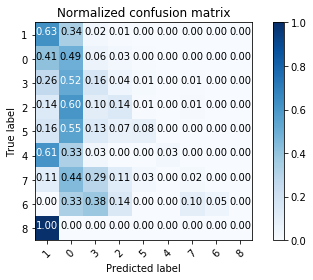

['0' '0' '0' ... '0' '1' '1']
             precision    recall  f1-score   support

          1       0.62      0.62      0.62     50238
          0       0.50      0.50      0.50     42122
          3       0.16      0.16      0.16      4798
          2       0.13      0.12      0.13      2109
          5       0.10      0.09      0.10       383
          4       0.04      0.04      0.04       196
          7       0.03      0.04      0.04       132
          6       0.05      0.05      0.05        20
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.53      0.53      0.53    100000

accuracy:  0.53371


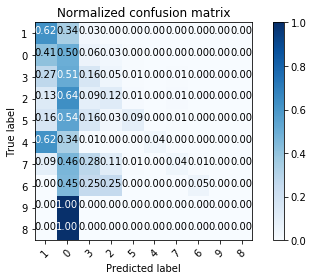

['0' '0' '0' ... '0' '0' '0']


/home/eleni/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 10, does not match size of target_names, 9
  .format(len(labels), len(target_names))
/home/eleni/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


             precision    recall  f1-score   support

          1       0.62      0.63      0.62     50168
          0       0.50      0.50      0.50     42243
          3       0.16      0.16      0.16      4786
          2       0.14      0.14      0.14      2063
          5       0.12      0.10      0.11       390
          4       0.03      0.03      0.03       180
          7       0.01      0.01      0.01       146
          6       0.11      0.09      0.10        23
          8       0.00      0.00      0.00         0

avg / total       0.53      0.53      0.53    100000

accuracy:  0.53451


/home/eleni/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in divide
  # Remove the CWD from sys.path while we load stuff.
/home/eleni/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


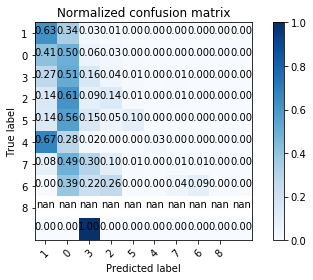

['1' '3' '0' ... '0' '0' '1']
             precision    recall  f1-score   support

          1       0.62      0.63      0.63     50125
          0       0.50      0.49      0.50     42238
          3       0.16      0.15      0.16      4821
          2       0.15      0.14      0.15      2077
          5       0.11      0.10      0.11       372
          4       0.03      0.02      0.03       202
          7       0.01      0.01      0.01       144
          6       0.04      0.06      0.05        18
          8       0.00      0.00      0.00         3

avg / total       0.53      0.54      0.54    100000

accuracy:  0.53673


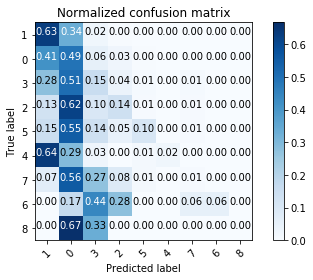

['0' '0' '0' ... '0' '1' '1']
             precision    recall  f1-score   support

          1       0.62      0.63      0.63     50259
          0       0.50      0.50      0.50     42174
          3       0.16      0.16      0.16      4792
          2       0.13      0.13      0.13      2049
          5       0.09      0.10      0.09       378
          4       0.05      0.05      0.05       178
          7       0.03      0.03      0.03       145
          6       0.07      0.04      0.05        23
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.54      0.54      0.54    100000

accuracy:  0.53571


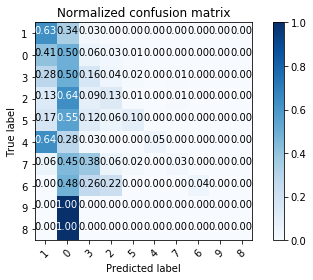

['1' '0' '0' ... '1' '0' '1']
             precision    recall  f1-score   support

          1       0.62      0.63      0.63     50034
          0       0.50      0.50      0.50     42307
          3       0.16      0.16      0.16      4815
          2       0.13      0.13      0.13      2091
          5       0.10      0.10      0.10       384
          4       0.04      0.03      0.04       204
          7       0.03      0.03      0.03       145
          6       0.04      0.06      0.05        18
          9       0.00      0.00      0.00         2

avg / total       0.54      0.54      0.54    100000

accuracy:  0.53652


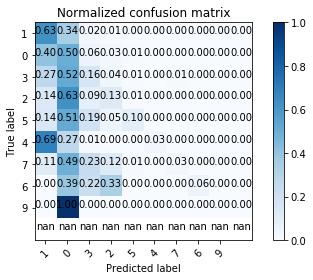

['0' '1' '0' ... '0' '1' '1']
             precision    recall  f1-score   support

          1       0.62      0.63      0.62     50281
          0       0.50      0.49      0.50     42234
          3       0.16      0.16      0.16      4746
          2       0.14      0.13      0.13      2061
          5       0.10      0.11      0.10       356
          4       0.02      0.03      0.03       161
          7       0.02      0.02      0.02       138
          6       0.12      0.05      0.07        22
          8       0.00      0.00      0.00         1

avg / total       0.53      0.53      0.53    100000

accuracy:  0.5344


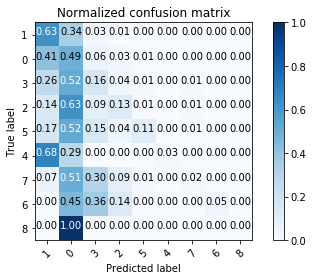

['0' '1' '1' ... '0' '1' '0']
             precision    recall  f1-score   support

          1       0.62      0.63      0.63     50012
          0       0.50      0.50      0.50     42247
          3       0.16      0.16      0.16      4861
          2       0.14      0.13      0.13      2079
          5       0.11      0.11      0.11       406
          4       0.04      0.03      0.03       221
          7       0.02      0.02      0.02       152
          6       0.04      0.05      0.05        19
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.53      0.54      0.54    100000

accuracy:  0.53604


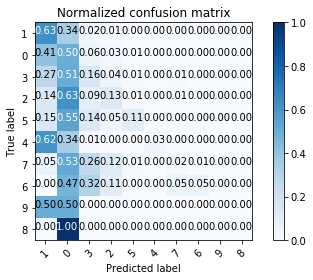

['0' '1' '0' ... '0' '1' '1']
             precision    recall  f1-score   support

          1       0.62      0.63      0.63     49948
          0       0.50      0.50      0.50     42479
          3       0.16      0.15      0.16      4801
          2       0.14      0.15      0.15      2031
          5       0.09      0.08      0.09       382
          4       0.05      0.05      0.05       192
          7       0.02      0.02      0.02       143
          6       0.07      0.10      0.08        21
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.54      0.54      0.54    100000

accuracy:  0.53644


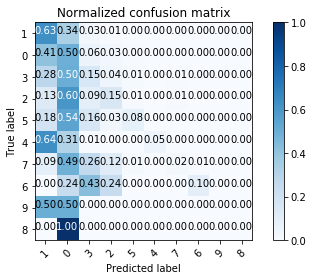

['1' '0' '0' ... '0' '1' '0']
             precision    recall  f1-score   support

          1       0.63      0.63      0.63     50345
          0       0.50      0.50      0.50     42002
          3       0.16      0.15      0.15      4806
          2       0.15      0.14      0.14      2109
          5       0.07      0.07      0.07       380
          4       0.03      0.04      0.03       190
          7       0.03      0.03      0.03       147
          6       0.04      0.05      0.04        20
          8       0.00      0.00      0.00         1

avg / total       0.54      0.54      0.54    100000

accuracy:  0.53685


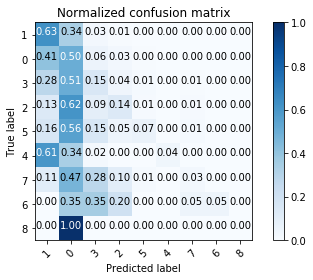

In [8]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        print predicted
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

          1       0.61      0.72      0.66     50301
          0       0.53      0.50      0.51     42112
          3       0.24      0.03      0.06      4840
          2       0.20      0.02      0.04      2030
          5       0.10      0.01      0.02       368
          4       0.00      0.00      0.00       186
          7       0.00      0.00      0.00       147
          6       0.00      0.00      0.00        15
          8       0.00      0.00      0.00         1

avg / total       0.55      0.58      0.55    100000

accuracy:  0.57554


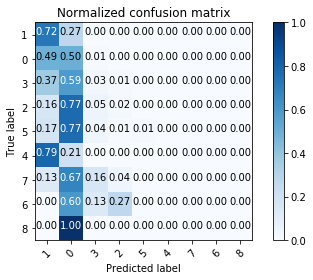

             precision    recall  f1-score   support

          1       0.61      0.73      0.66     49992
          0       0.53      0.49      0.51     42369
          3       0.26      0.04      0.07      4767
          2       0.22      0.02      0.04      2110
          5       0.08      0.01      0.01       394
          4       0.00      0.00      0.00       196
          7       0.00      0.00      0.00       143
          6       0.00      0.00      0.00        26
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.55      0.57      0.55    100000

accuracy:  0.57471


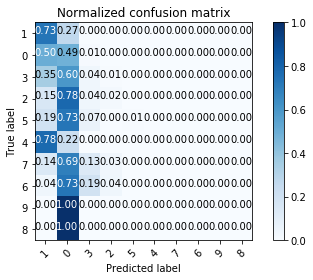

             precision    recall  f1-score   support

          1       0.61      0.73      0.66     50033
          0       0.53      0.49      0.51     42293
          3       0.26      0.04      0.06      4807
          2       0.22      0.02      0.04      2116
          5       0.21      0.01      0.02       391
          4       0.00      0.00      0.00       204
          7       0.00      0.00      0.00       136
          6       0.00      0.00      0.00        19
          8       0.00      0.00      0.00         1

avg / total       0.55      0.57      0.55    100000

accuracy:  0.57466


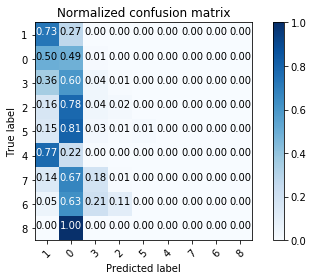

             precision    recall  f1-score   support

          1       0.61      0.73      0.67     50260
          0       0.53      0.50      0.51     42188
          3       0.22      0.03      0.06      4800
          2       0.25      0.02      0.04      2024
          5       0.09      0.01      0.01       371
          4       0.00      0.00      0.00       178
          7       0.00      0.00      0.00       154
          6       0.00      0.00      0.00        22
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.55      0.58      0.55    100000

accuracy:  0.57723


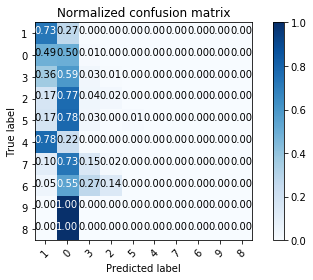

             precision    recall  f1-score   support

          1       0.61      0.72      0.66     50261
          0       0.53      0.50      0.51     42079
          3       0.25      0.04      0.06      4822
          2       0.23      0.02      0.04      2093
          5       0.11      0.01      0.02       389
          4       0.00      0.00      0.00       193
          7       0.00      0.00      0.00       137
          6       0.00      0.00      0.00        24
          8       0.00      0.00      0.00         2

avg / total       0.55      0.58      0.55    100000

accuracy:  0.57596


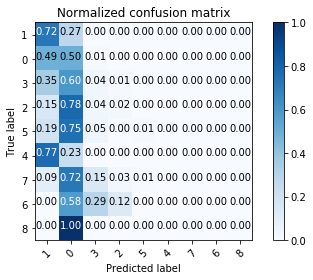

             precision    recall  f1-score   support

          1       0.61      0.73      0.66     50032
          0       0.53      0.49      0.51     42402
          3       0.27      0.04      0.07      4785
          2       0.27      0.03      0.05      2047
          5       0.09      0.01      0.01       373
          4       0.00      0.00      0.00       189
          7       0.25      0.01      0.01       153
          6       0.00      0.00      0.00        17
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.55      0.58      0.55    100000

accuracy:  0.57589


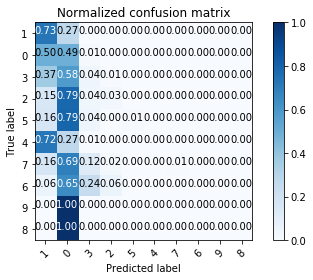

             precision    recall  f1-score   support

          1       0.62      0.73      0.67     50268
          0       0.53      0.50      0.51     42105
          3       0.26      0.04      0.07      4832
          2       0.22      0.02      0.04      2071
          5       0.06      0.01      0.01       373
          4       0.00      0.00      0.00       183
          7       0.00      0.00      0.00       143
          6       0.00      0.00      0.00        23
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.55      0.58      0.56    100000

accuracy:  0.57817


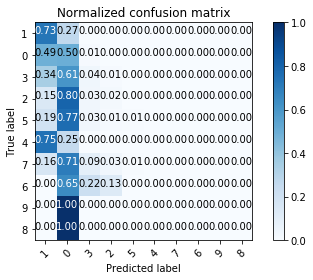

             precision    recall  f1-score   support

          1       0.61      0.72      0.66     50025
          0       0.53      0.49      0.51     42376
          3       0.25      0.04      0.07      4775
          2       0.21      0.02      0.04      2069
          5       0.14      0.01      0.02       389
          4       0.00      0.00      0.00       199
          7       0.00      0.00      0.00       147
          6       0.00      0.00      0.00        18
          8       0.00      0.00      0.00         2

avg / total       0.55      0.57      0.55    100000

accuracy:  0.57383


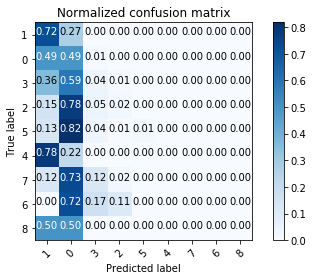

             precision    recall  f1-score   support

          1       0.61      0.72      0.66     50080
          0       0.53      0.50      0.51     42221
          3       0.26      0.04      0.07      4839
          2       0.23      0.02      0.04      2110
          5       0.07      0.01      0.01       382
          4       0.00      0.00      0.00       194
          7       0.00      0.00      0.00       148
          6       0.00      0.00      0.00        24
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.55      0.57      0.55    100000

accuracy:  0.57356


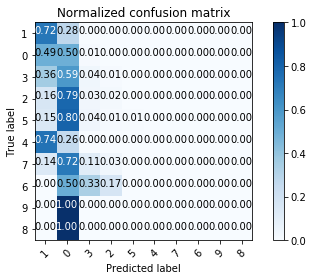

             precision    recall  f1-score   support

          1       0.61      0.73      0.67     50213
          0       0.53      0.49      0.51     42260
          3       0.24      0.04      0.07      4768
          2       0.22      0.02      0.04      2030
          5       0.07      0.01      0.01       380
          4       0.00      0.00      0.00       188
          7       0.00      0.00      0.00       142
          6       0.00      0.00      0.00        17
          8       0.00      0.00      0.00         2

avg / total       0.55      0.58      0.55    100000

accuracy:  0.57705


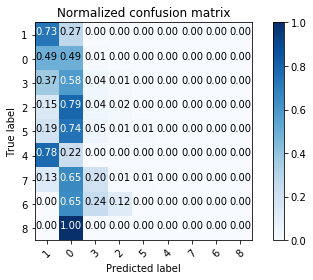

In [9]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

          1       0.62      0.78      0.69     50449
          0       0.55      0.47      0.51     42007
          3       0.29      0.02      0.04      4765
          2       0.32      0.01      0.02      2057
          5       0.00      0.00      0.00       378
          4       0.00      0.00      0.00       186
          7       0.00      0.00      0.00       142
          6       0.00      0.00      0.00        13
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.59512


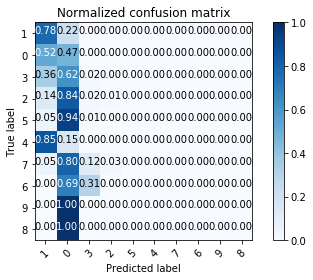

             precision    recall  f1-score   support

          1       0.61      0.79      0.69     49844
          0       0.56      0.46      0.51     42474
          3       0.26      0.02      0.04      4842
          2       0.31      0.01      0.02      2083
          5       0.00      0.00      0.00       384
          4       0.00      0.00      0.00       196
          7       0.00      0.00      0.00       148
          6       0.00      0.00      0.00        28
          8       0.00      0.00      0.00         1

avg / total       0.56      0.59      0.56    100000

accuracy:  0.59262


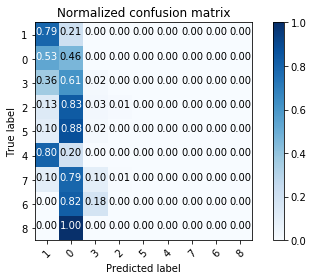

             precision    recall  f1-score   support

          1       0.62      0.79      0.69     50047
          0       0.56      0.47      0.51     42407
          3       0.30      0.02      0.04      4742
          2       0.24      0.01      0.02      2049
          5       0.00      0.00      0.00       398
          4       0.00      0.00      0.00       195
          7       0.00      0.00      0.00       141
          6       0.00      0.00      0.00        20
          9       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.59528


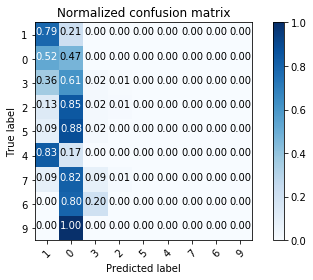

             precision    recall  f1-score   support

          1       0.62      0.78      0.69     50246
          0       0.55      0.47      0.51     42074
          3       0.28      0.02      0.04      4865
          2       0.35      0.01      0.02      2091
          5       0.00      0.00      0.00       364
          4       0.00      0.00      0.00       187
          7       0.00      0.00      0.00       149
          6       0.00      0.00      0.00        21
          8       0.00      0.00      0.00         3

avg / total       0.56      0.59      0.56    100000

accuracy:  0.59274


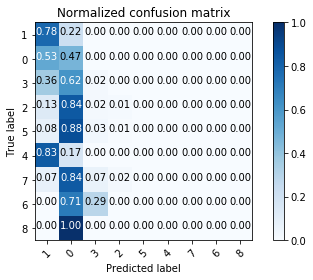

             precision    recall  f1-score   support

          1       0.62      0.79      0.69     50087
          0       0.56      0.47      0.51     42380
          3       0.26      0.02      0.04      4744
          2       0.20      0.01      0.02      2048
          5       0.14      0.00      0.01       393
          4       0.00      0.00      0.00       175
          7       0.00      0.00      0.00       146
          6       0.00      0.00      0.00        25
          8       0.00      0.00      0.00         2

avg / total       0.56      0.59      0.56    100000

accuracy:  0.59419


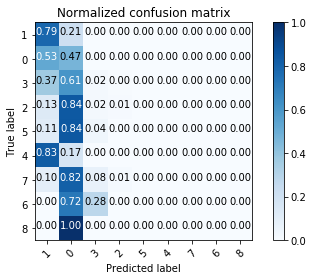

             precision    recall  f1-score   support

          1       0.62      0.79      0.69     50206
          0       0.55      0.47      0.51     42101
          3       0.33      0.02      0.04      4863
          2       0.30      0.01      0.01      2092
          5       0.00      0.00      0.00       369
          4       0.00      0.00      0.00       207
          7       0.00      0.00      0.00       144
          6       0.00      0.00      0.00        16
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.57      0.59      0.56    100000

accuracy:  0.59401


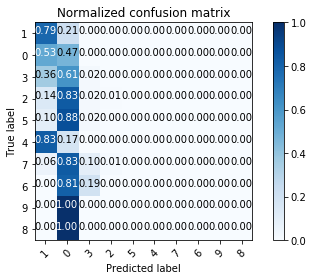

             precision    recall  f1-score   support

          1       0.61      0.79      0.69     49895
          0       0.56      0.46      0.51     42541
          3       0.28      0.02      0.04      4789
          2       0.23      0.01      0.02      2058
          5       0.14      0.00      0.01       353
          4       0.00      0.00      0.00       201
          7       0.00      0.00      0.00       139
          6       0.00      0.00      0.00        23
          9       0.00      0.00      0.00         1

avg / total       0.56      0.59      0.56    100000

accuracy:  0.59328


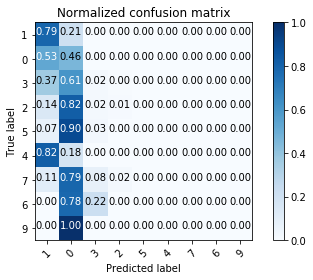

             precision    recall  f1-score   support

          1       0.62      0.78      0.69     50398
          0       0.55      0.47      0.51     41940
          3       0.27      0.02      0.03      4818
          2       0.24      0.01      0.01      2082
          5       0.00      0.00      0.00       409
          4       0.00      0.00      0.00       181
          7       0.00      0.00      0.00       151
          6       0.00      0.00      0.00        18
          8       0.00      0.00      0.00         3

avg / total       0.56      0.59      0.56    100000

accuracy:  0.59469


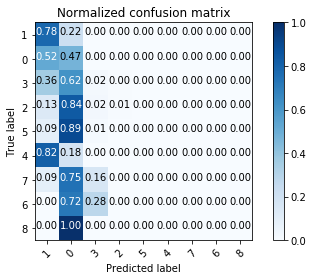

             precision    recall  f1-score   support

          1       0.61      0.79      0.69     50056
          0       0.55      0.46      0.50     42451
          3       0.28      0.02      0.03      4772
          2       0.22      0.01      0.02      1988
          5       0.00      0.00      0.00       370
          4       0.00      0.00      0.00       191
          7       0.00      0.00      0.00       144
          6       0.00      0.00      0.00        26
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.56      0.59      0.56    100000

accuracy:  0.59126


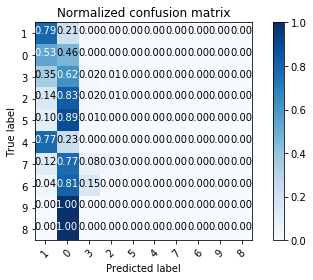

             precision    recall  f1-score   support

          1       0.62      0.79      0.69     50237
          0       0.55      0.47      0.51     42030
          3       0.25      0.02      0.03      4835
          2       0.31      0.01      0.01      2152
          5       0.67      0.01      0.01       392
          4       0.00      0.00      0.00       191
          7       0.00      0.00      0.00       146
          6       0.00      0.00      0.00        15
          8       0.00      0.00      0.00         2

avg / total       0.56      0.59      0.56    100000

accuracy:  0.5932


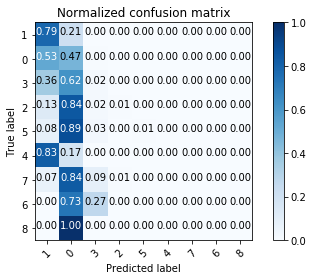

In [10]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

          1       0.62      0.77      0.69     50158
          0       0.55      0.49      0.52     42172
          3       0.35      0.01      0.02      4878
          2       0.23      0.00      0.00      2041
          5       0.00      0.00      0.00       389
          4       0.00      0.00      0.00       184
          7       0.00      0.00      0.00       154
          6       0.00      0.00      0.00        23
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.59605


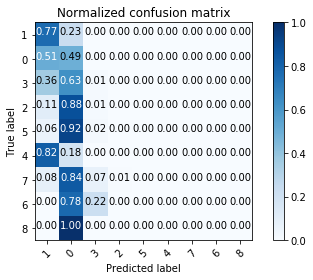

             precision    recall  f1-score   support

          1       0.62      0.78      0.69     50135
          0       0.56      0.49      0.52     42309
          3       0.33      0.01      0.02      4729
          2       0.32      0.01      0.01      2099
          5       0.00      0.00      0.00       373
          4       0.00      0.00      0.00       198
          7       0.00      0.00      0.00       136
          6       0.00      0.00      0.00        18
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.59643


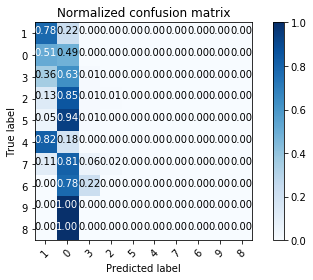

             precision    recall  f1-score   support

          1       0.62      0.77      0.69     50149
          0       0.55      0.49      0.52     42157
          3       0.34      0.01      0.02      4844
          2       0.25      0.00      0.00      2130
          5       0.00      0.00      0.00       381
          4       0.00      0.00      0.00       173
          7       0.00      0.00      0.00       145
          6       0.00      0.00      0.00        18
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.59626


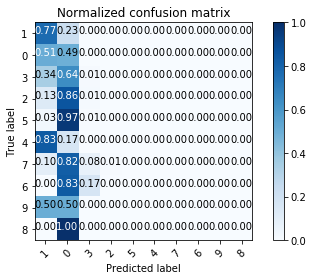

             precision    recall  f1-score   support

          1       0.62      0.77      0.69     50144
          0       0.55      0.49      0.52     42324
          3       0.29      0.01      0.02      4763
          2       0.31      0.00      0.01      2010
          5       0.00      0.00      0.00       381
          4       0.00      0.00      0.00       209
          7       0.00      0.00      0.00       145
          6       0.00      0.00      0.00        23
          8       0.00      0.00      0.00         1

avg / total       0.57      0.59      0.57    100000

accuracy:  0.59499


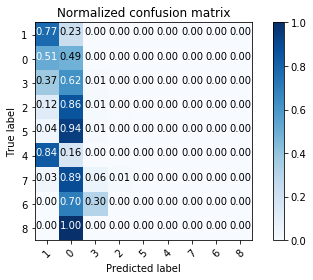

             precision    recall  f1-score   support

          1       0.63      0.77      0.69     50336
          0       0.55      0.50      0.52     42122
          3       0.29      0.01      0.02      4761
          2       0.36      0.01      0.01      2049
          5       0.00      0.00      0.00       389
          4       0.00      0.00      0.00       188
          7       0.00      0.00      0.00       129
          6       0.00      0.00      0.00        23
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.59838


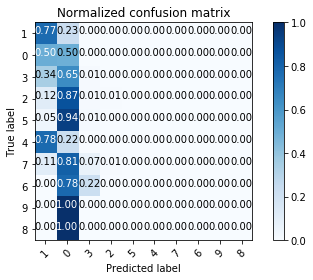

             precision    recall  f1-score   support

          1       0.62      0.78      0.69     49957
          0       0.55      0.49      0.52     42359
          3       0.31      0.01      0.02      4846
          2       0.15      0.00      0.00      2091
          5       0.00      0.00      0.00       373
          4       0.00      0.00      0.00       194
          7       0.00      0.00      0.00       161
          6       0.00      0.00      0.00        18
          8       0.00      0.00      0.00         1

avg / total       0.56      0.59      0.56    100000

accuracy:  0.5946


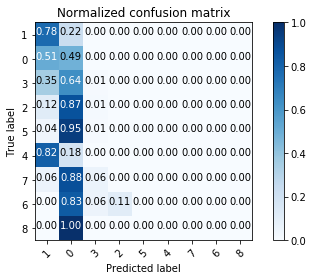

             precision    recall  f1-score   support

          1       0.62      0.77      0.69     50242
          0       0.55      0.49      0.52     42145
          3       0.37      0.01      0.02      4809
          2       0.32      0.00      0.01      2057
          5       0.00      0.00      0.00       393
          4       0.00      0.00      0.00       200
          7       0.00      0.00      0.00       133
          6       0.00      0.00      0.00        20
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.59511


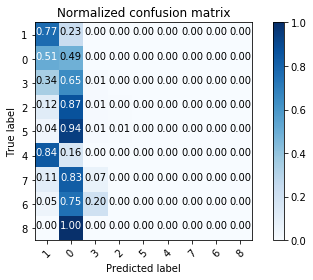

             precision    recall  f1-score   support

          1       0.62      0.78      0.69     50051
          0       0.56      0.49      0.52     42336
          3       0.35      0.01      0.03      4798
          2       0.31      0.00      0.00      2083
          5       0.00      0.00      0.00       369
          4       0.00      0.00      0.00       182
          7       0.00      0.00      0.00       157
          6       0.00      0.00      0.00        21
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.59705


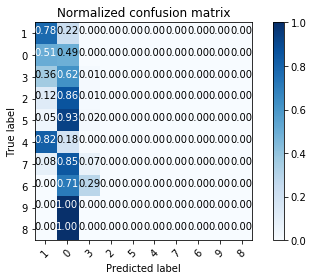

             precision    recall  f1-score   support

          1       0.62      0.78      0.69     50099
          0       0.55      0.49      0.52     42292
          3       0.27      0.01      0.02      4752
          2       0.29      0.00      0.00      2092
          5       0.00      0.00      0.00       398
          4       0.00      0.00      0.00       195
          7       0.00      0.00      0.00       146
          6       0.00      0.00      0.00        23
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.59645


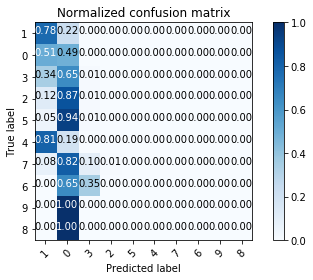

             precision    recall  f1-score   support

          1       0.62      0.78      0.69     50194
          0       0.56      0.49      0.52     42189
          3       0.35      0.01      0.02      4855
          2       0.17      0.00      0.00      2048
          5       0.00      0.00      0.00       364
          4       0.00      0.00      0.00       187
          7       0.00      0.00      0.00       144
          6       0.00      0.00      0.00        18
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.59759


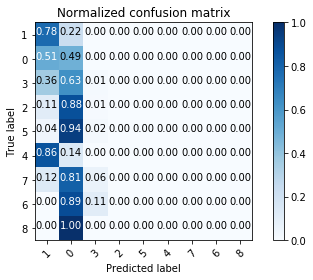

In [11]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

          1       0.62      0.79      0.70     50183
          0       0.56      0.48      0.52     42179
          3       0.36      0.01      0.02      4806
          2       0.29      0.00      0.00      2065
          5       0.00      0.00      0.00       403
          4       0.00      0.00      0.00       201
          7       0.00      0.00      0.00       137
          6       0.00      0.00      0.00        24
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60206


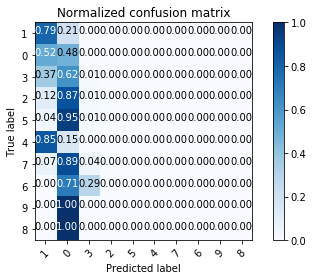

             precision    recall  f1-score   support

          1       0.62      0.79      0.70     50110
          0       0.56      0.48      0.52     42302
          3       0.34      0.01      0.01      4801
          2       0.00      0.00      0.00      2075
          5       0.00      0.00      0.00       359
          4       0.00      0.00      0.00       181
          7       0.00      0.00      0.00       153
          6       0.00      0.00      0.00        17
          8       0.00      0.00      0.00         2

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60065


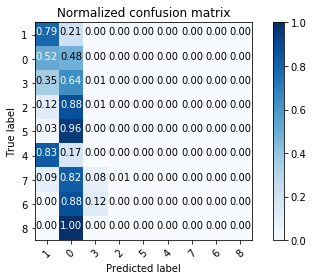

             precision    recall  f1-score   support

          1       0.62      0.79      0.69     50101
          0       0.56      0.48      0.52     42218
          3       0.41      0.01      0.01      4811
          2       0.29      0.00      0.00      2124
          5       0.00      0.00      0.00       377
          4       0.00      0.00      0.00       192
          7       0.00      0.00      0.00       156
          6       0.00      0.00      0.00        19
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.59692


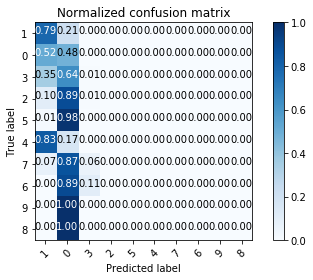

             precision    recall  f1-score   support

          1       0.62      0.79      0.70     50192
          0       0.56      0.48      0.52     42263
          3       0.35      0.01      0.02      4796
          2       0.22      0.00      0.00      2016
          5       0.00      0.00      0.00       385
          4       0.00      0.00      0.00       190
          7       0.00      0.00      0.00       134
          6       0.00      0.00      0.00        22
          8       0.00      0.00      0.00         2

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60045


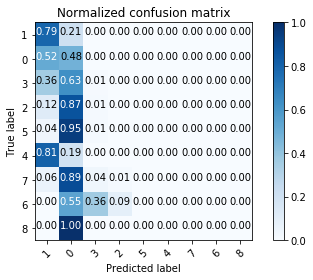

             precision    recall  f1-score   support

          1       0.62      0.79      0.70     50108
          0       0.56      0.48      0.52     42215
          3       0.33      0.01      0.01      4827
          2       0.42      0.00      0.00      2100
          5       0.00      0.00      0.00       395
          4       0.00      0.00      0.00       198
          7       0.00      0.00      0.00       136
          6       0.00      0.00      0.00        19
          8       0.00      0.00      0.00         2

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60042


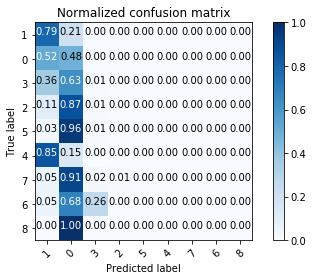

             precision    recall  f1-score   support

          1       0.62      0.79      0.70     50185
          0       0.56      0.48      0.52     42266
          3       0.35      0.01      0.02      4780
          2       0.23      0.00      0.00      2040
          5       0.00      0.00      0.00       367
          4       0.00      0.00      0.00       184
          7       0.00      0.00      0.00       154
          6       0.00      0.00      0.00        22
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60181


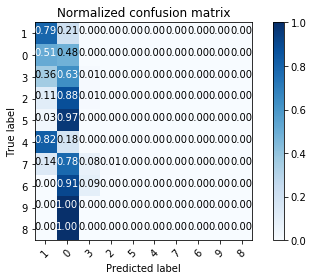

             precision    recall  f1-score   support

          1       0.62      0.79      0.70     50156
          0       0.56      0.49      0.52     42141
          3       0.34      0.01      0.02      4858
          2       0.38      0.00      0.00      2077
          5       0.00      0.00      0.00       383
          4       0.00      0.00      0.00       207
          7       0.00      0.00      0.00       150
          6       0.00      0.00      0.00        26
          8       0.00      0.00      0.00         2

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60104


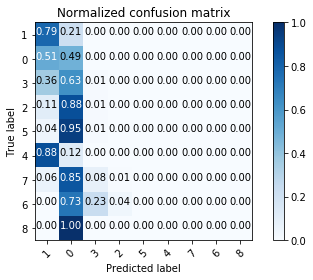

             precision    recall  f1-score   support

          1       0.62      0.79      0.70     50137
          0       0.56      0.48      0.52     42340
          3       0.39      0.01      0.01      4749
          2       0.16      0.00      0.00      2063
          5       0.00      0.00      0.00       379
          4       0.00      0.00      0.00       175
          7       0.00      0.00      0.00       140
          6       0.00      0.00      0.00        15
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60045


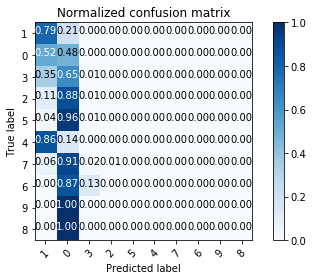

             precision    recall  f1-score   support

          1       0.62      0.80      0.70     50071
          0       0.57      0.48      0.52     42361
          3       0.29      0.01      0.01      4766
          2       0.17      0.00      0.00      2049
          5       0.00      0.00      0.00       377
          4       0.00      0.00      0.00       194
          7       0.00      0.00      0.00       158
          6       0.00      0.00      0.00        21
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60216


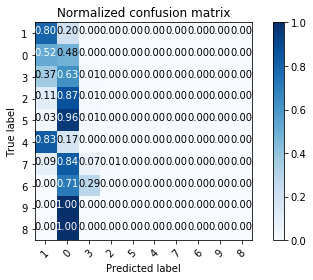

             precision    recall  f1-score   support

          1       0.63      0.79      0.70     50222
          0       0.56      0.49      0.52     42120
          3       0.29      0.00      0.01      4841
          2       0.10      0.00      0.00      2091
          5       0.00      0.00      0.00       385
          4       0.00      0.00      0.00       188
          7       0.00      0.00      0.00       132
          6       0.00      0.00      0.00        20
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60212


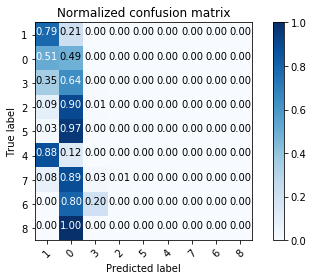

In [12]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

          1       0.62      0.79      0.70     50183
          0       0.56      0.48      0.52     42210
          3       0.31      0.00      0.01      4760
          2       0.33      0.00      0.00      2100
          5       0.00      0.00      0.00       389
          4       0.00      0.00      0.00       200
          7       0.00      0.00      0.00       139
          6       0.00      0.00      0.00        17
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60162


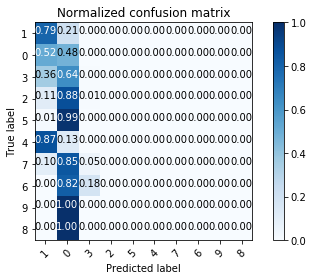

             precision    recall  f1-score   support

          1       0.62      0.80      0.70     50110
          0       0.57      0.48      0.52     42271
          3       0.51      0.00      0.01      4847
          2       0.33      0.00      0.00      2040
          5       0.00      0.00      0.00       373
          4       0.00      0.00      0.00       182
          7       0.00      0.00      0.00       151
          6       0.00      0.00      0.00        24
          8       0.00      0.00      0.00         2

avg / total       0.58      0.60      0.57    100000

accuracy:  0.60292


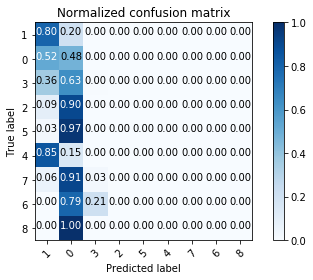

             precision    recall  f1-score   support

          1       0.63      0.80      0.70     50240
          0       0.57      0.48      0.52     42164
          3       0.34      0.00      0.01      4804
          2       0.00      0.00      0.00      2067
          5       0.00      0.00      0.00       387
          4       0.00      0.00      0.00       177
          7       0.00      0.00      0.00       142
          6       0.00      0.00      0.00        17
          8       0.00      0.00      0.00         2

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60462


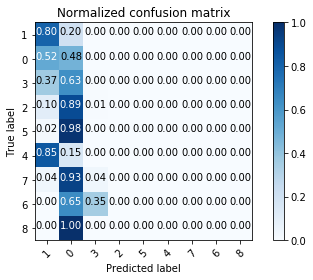

             precision    recall  f1-score   support

          1       0.62      0.79      0.70     50053
          0       0.56      0.48      0.52     42317
          3       0.39      0.00      0.01      4803
          2       0.33      0.00      0.00      2073
          5       0.00      0.00      0.00       375
          4       0.00      0.00      0.00       205
          7       0.00      0.00      0.00       148
          6       0.00      0.00      0.00        24
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.58      0.60      0.57    100000

accuracy:  0.60227


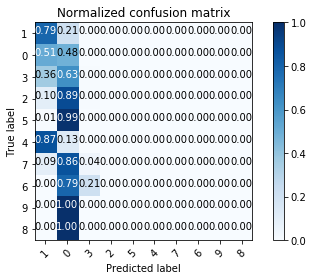

             precision    recall  f1-score   support

          1       0.62      0.80      0.70     49935
          0       0.56      0.47      0.51     42457
          3       0.44      0.00      0.01      4734
          2       0.00      0.00      0.00      2136
          5       0.00      0.00      0.00       378
          4       0.00      0.00      0.00       199
          7       0.00      0.00      0.00       139
          6       0.00      0.00      0.00        22

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60047


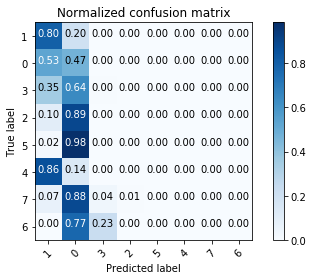

             precision    recall  f1-score   support

          1       0.63      0.79      0.70     50358
          0       0.56      0.49      0.52     42024
          3       0.49      0.00      0.01      4873
          2       0.33      0.00      0.00      2004
          5       0.00      0.00      0.00       384
          4       0.00      0.00      0.00       183
          7       0.00      0.00      0.00       151
          6       0.00      0.00      0.00        19
          9       0.00      0.00      0.00         3
          8       0.00      0.00      0.00         1

avg / total       0.58      0.60      0.57    100000

accuracy:  0.60295


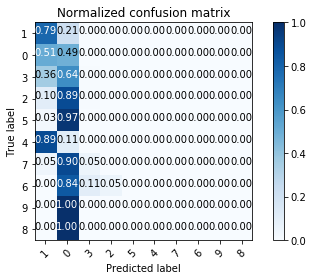

             precision    recall  f1-score   support

          1       0.63      0.79      0.70     50233
          0       0.56      0.48      0.52     42104
          3       0.40      0.01      0.01      4837
          2       0.33      0.00      0.00      2101
          5       0.00      0.00      0.00       379
          4       0.00      0.00      0.00       199
          7       0.00      0.00      0.00       131
          6       0.00      0.00      0.00        14
          8       0.00      0.00      0.00         2

avg / total       0.58      0.60      0.57    100000

accuracy:  0.60279


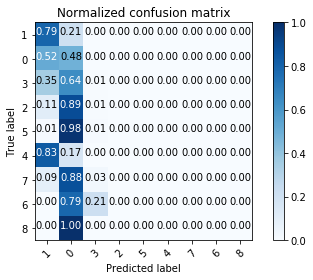

             precision    recall  f1-score   support

          1       0.62      0.80      0.70     50060
          0       0.57      0.48      0.52     42377
          3       0.42      0.00      0.01      4770
          2       0.00      0.00      0.00      2039
          5       0.00      0.00      0.00       383
          4       0.00      0.00      0.00       183
          7       0.00      0.00      0.00       159
          6       0.00      0.00      0.00        27
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60172


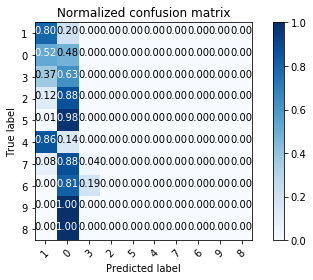

             precision    recall  f1-score   support

          1       0.62      0.80      0.70     50145
          0       0.56      0.48      0.52     42318
          3       0.31      0.00      0.01      4782
          2       1.00      0.00      0.00      2019
          5       0.00      0.00      0.00       379
          4       0.00      0.00      0.00       200
          7       0.00      0.00      0.00       136
          6       0.00      0.00      0.00        20
          8       0.00      0.00      0.00         1

avg / total       0.59      0.60      0.57    100000

accuracy:  0.60111


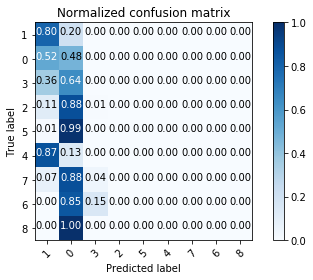

             precision    recall  f1-score   support

          1       0.62      0.79      0.70     50148
          0       0.56      0.48      0.52     42163
          3       0.42      0.00      0.01      4825
          2       0.00      0.00      0.00      2121
          5       0.00      0.00      0.00       383
          4       0.00      0.00      0.00       182
          7       0.00      0.00      0.00       154
          6       0.00      0.00      0.00        21
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60026


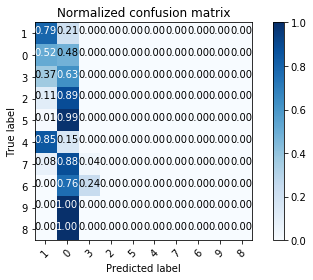

In [13]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

          1       0.62      0.81      0.70     50039
          0       0.57      0.47      0.51     42438
          3       0.34      0.00      0.01      4712
          2       0.00      0.00      0.00      2087
          5       0.00      0.00      0.00       377
          4       0.00      0.00      0.00       181
          7       0.00      0.00      0.00       141
          6       0.00      0.00      0.00        22
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60395


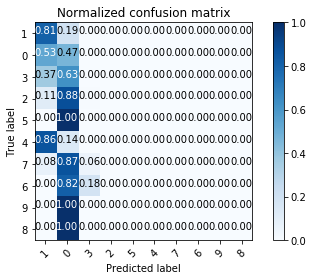

             precision    recall  f1-score   support

          1       0.62      0.80      0.70     50254
          0       0.57      0.47      0.52     42043
          3       0.67      0.00      0.00      4895
          2       0.00      0.00      0.00      2053
          5       0.00      0.00      0.00       385
          4       0.00      0.00      0.00       201
          7       0.00      0.00      0.00       149
          6       0.00      0.00      0.00        19
          8       0.00      0.00      0.00         1

avg / total       0.58      0.60      0.57    100000

accuracy:  0.60357


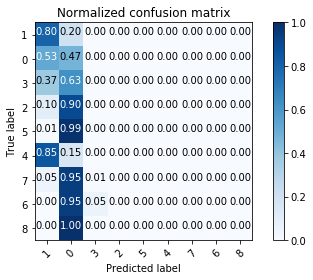

             precision    recall  f1-score   support

          1       0.62      0.81      0.70     50031
          0       0.57      0.47      0.51     42404
          3       0.50      0.00      0.00      4799
          2       0.00      0.00      0.00      2004
          5       0.00      0.00      0.00       393
          4       0.00      0.00      0.00       198
          7       0.00      0.00      0.00       152
          6       0.00      0.00      0.00        16
          8       0.00      0.00      0.00         3

avg / total       0.58      0.60      0.57    100000

accuracy:  0.60195


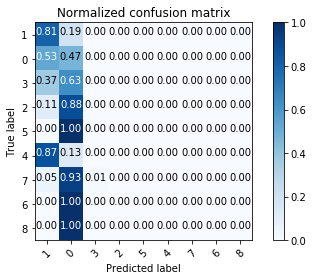

             precision    recall  f1-score   support

          1       0.63      0.80      0.70     50262
          0       0.57      0.48      0.52     42077
          3       0.54      0.00      0.01      4808
          2       0.00      0.00      0.00      2136
          5       0.00      0.00      0.00       369
          4       0.00      0.00      0.00       184
          7       0.00      0.00      0.00       138
          6       0.00      0.00      0.00        25
          9       0.00      0.00      0.00         1

avg / total       0.58      0.61      0.57    100000

accuracy:  0.60507


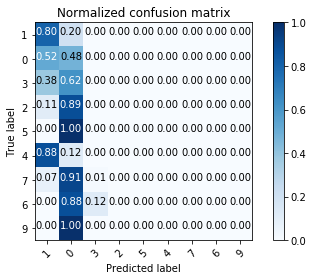

             precision    recall  f1-score   support

          1       0.62      0.81      0.70     49998
          0       0.57      0.47      0.51     42431
          3       0.40      0.00      0.00      4710
          2       0.00      0.00      0.00      2106
          5       0.00      0.00      0.00       386
          4       0.00      0.00      0.00       200
          7       0.00      0.00      0.00       148
          6       0.00      0.00      0.00        17
          9       0.00      0.00      0.00         3
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60169


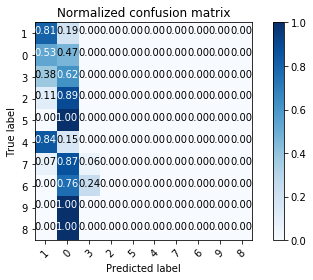

             precision    recall  f1-score   support

          1       0.62      0.80      0.70     50295
          0       0.56      0.47      0.51     42050
          3       0.25      0.00      0.00      4897
          2       0.00      0.00      0.00      2034
          5       0.00      0.00      0.00       376
          4       0.00      0.00      0.00       182
          7       0.00      0.00      0.00       142
          6       0.00      0.00      0.00        24

avg / total       0.56      0.60      0.57    100000

accuracy:  0.60188


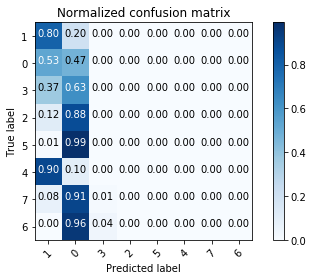

             precision    recall  f1-score   support

          1       0.62      0.80      0.70     50133
          0       0.57      0.47      0.52     42225
          3       0.27      0.00      0.00      4808
          2       0.00      0.00      0.00      2069
          5       0.00      0.00      0.00       387
          4       0.00      0.00      0.00       199
          7       0.00      0.00      0.00       153
          6       0.00      0.00      0.00        25
          8       0.00      0.00      0.00         1

avg / total       0.56      0.60      0.57    100000

accuracy:  0.60264


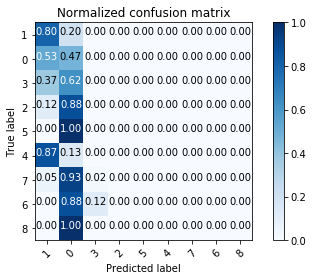

             precision    recall  f1-score   support

          1       0.62      0.81      0.70     50160
          0       0.57      0.47      0.51     42256
          3       0.43      0.00      0.00      4799
          2       0.00      0.00      0.00      2071
          5       0.00      0.00      0.00       375
          4       0.00      0.00      0.00       183
          7       0.00      0.00      0.00       137
          6       0.00      0.00      0.00        16
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60203


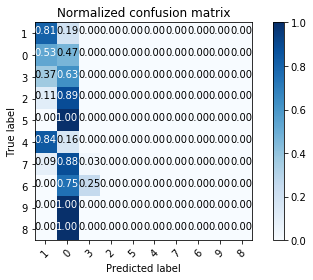

             precision    recall  f1-score   support

          1       0.62      0.80      0.70     50239
          0       0.57      0.48      0.52     42260
          3       0.50      0.00      0.00      4717
          2       0.00      0.00      0.00      2060
          5       0.00      0.00      0.00       358
          4       0.00      0.00      0.00       199
          7       0.00      0.00      0.00       140
          6       0.00      0.00      0.00        23
          9       0.00      0.00      0.00         3
          8       0.00      0.00      0.00         1

avg / total       0.58      0.61      0.57    100000

accuracy:  0.60574


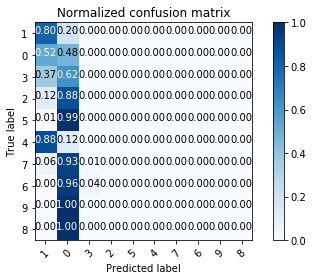

             precision    recall  f1-score   support

          1       0.62      0.81      0.70     50054
          0       0.57      0.47      0.51     42221
          3       0.35      0.00      0.00      4890
          2       0.00      0.00      0.00      2080
          5       0.00      0.00      0.00       404
          4       0.00      0.00      0.00       183
          7       0.00      0.00      0.00       150
          6       0.00      0.00      0.00        18

avg / total       0.57      0.60      0.57    100000

accuracy:  0.6007


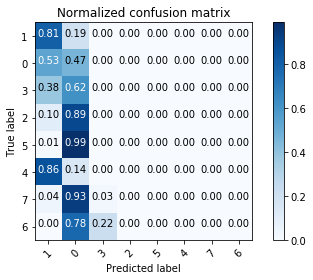

In [14]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

          1       0.61      0.82      0.70     50164
          0       0.57      0.45      0.50     42226
          3       0.25      0.00      0.00      4818
          2       0.00      0.00      0.00      2067
          5       0.00      0.00      0.00       364
          4       0.00      0.00      0.00       187
          7       0.00      0.00      0.00       152
          6       0.00      0.00      0.00        20
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.56      0.60      0.56    100000

accuracy:  0.59792


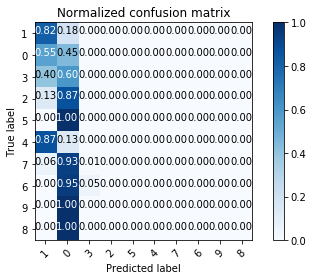

             precision    recall  f1-score   support

          1       0.62      0.82      0.70     50129
          0       0.57      0.45      0.50     42255
          3       0.00      0.00      0.00      4789
          2       0.00      0.00      0.00      2073
          5       0.00      0.00      0.00       398
          4       0.00      0.00      0.00       195
          7       0.00      0.00      0.00       138
          6       0.00      0.00      0.00        21
          8       0.00      0.00      0.00         2

avg / total       0.55      0.60      0.56    100000

accuracy:  0.59911


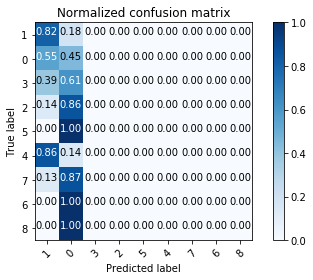

             precision    recall  f1-score   support

          1       0.61      0.82      0.70     50023
          0       0.57      0.45      0.50     42396
          3       0.00      0.00      0.00      4799
          2       0.00      0.00      0.00      2037
          5       0.00      0.00      0.00       390
          4       0.00      0.00      0.00       191
          7       0.00      0.00      0.00       133
          6       0.00      0.00      0.00        28
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.55      0.60      0.56    100000

accuracy:  0.59899


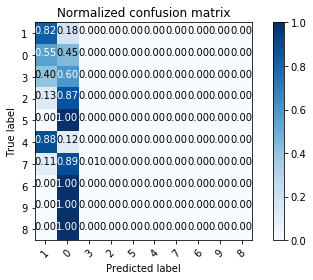

             precision    recall  f1-score   support

          1       0.62      0.81      0.70     50270
          0       0.56      0.45      0.50     42085
          3       0.00      0.00      0.00      4808
          2       0.00      0.00      0.00      2103
          5       0.00      0.00      0.00       372
          4       0.00      0.00      0.00       191
          7       0.00      0.00      0.00       157
          6       0.00      0.00      0.00        13
          8       0.00      0.00      0.00         1

avg / total       0.55      0.60      0.56    100000

accuracy:  0.59798


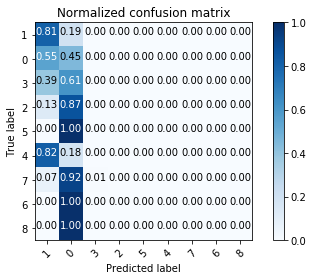

             precision    recall  f1-score   support

          1       0.62      0.81      0.70     50184
          0       0.56      0.45      0.50     42180
          3       0.20      0.00      0.00      4791
          2       0.00      0.00      0.00      2101
          5       0.00      0.00      0.00       381
          4       0.00      0.00      0.00       193
          7       0.00      0.00      0.00       147
          6       0.00      0.00      0.00        20
          8       0.00      0.00      0.00         3

avg / total       0.56      0.60      0.56    100000

accuracy:  0.59809


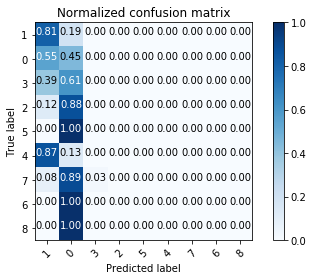

             precision    recall  f1-score   support

          1       0.61      0.81      0.70     50109
          0       0.57      0.45      0.50     42301
          3       0.33      0.00      0.00      4816
          2       0.00      0.00      0.00      2039
          5       0.00      0.00      0.00       381
          4       0.00      0.00      0.00       189
          7       0.00      0.00      0.00       143
          6       0.00      0.00      0.00        21
          9       0.00      0.00      0.00         1

avg / total       0.56      0.60      0.56    100000

accuracy:  0.59826


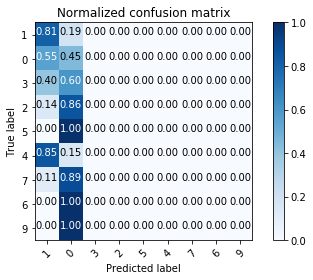

             precision    recall  f1-score   support

          1       0.62      0.82      0.70     50066
          0       0.57      0.45      0.50     42257
          3       0.22      0.00      0.00      4814
          2       0.00      0.00      0.00      2109
          5       0.00      0.00      0.00       381
          4       0.00      0.00      0.00       203
          7       0.00      0.00      0.00       150
          6       0.00      0.00      0.00        17
          8       0.00      0.00      0.00         3

avg / total       0.56      0.60      0.56    100000

accuracy:  0.5999


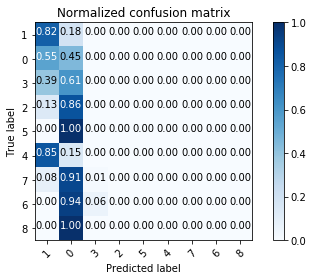

             precision    recall  f1-score   support

          1       0.62      0.81      0.70     50227
          0       0.56      0.45      0.50     42224
          3       0.00      0.00      0.00      4793
          2       0.00      0.00      0.00      2031
          5       0.00      0.00      0.00       381
          4       0.00      0.00      0.00       179
          7       0.00      0.00      0.00       140
          6       0.00      0.00      0.00        24
          9       0.00      0.00      0.00         1

avg / total       0.55      0.60      0.56    100000

accuracy:  0.59848


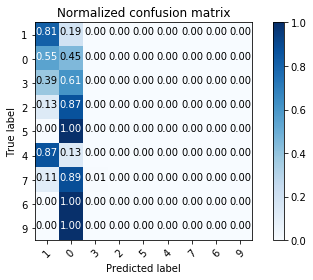

             precision    recall  f1-score   support

          1       0.62      0.81      0.70     50129
          0       0.56      0.45      0.50     42148
          3       0.00      0.00      0.00      4864
          2       0.00      0.00      0.00      2101
          5       0.00      0.00      0.00       395
          4       0.00      0.00      0.00       192
          7       0.00      0.00      0.00       154
          6       0.00      0.00      0.00        15
          8       0.00      0.00      0.00         2

avg / total       0.55      0.60      0.56    100000

accuracy:  0.59798


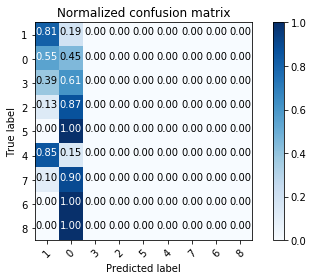

             precision    recall  f1-score   support

          1       0.61      0.82      0.70     50164
          0       0.57      0.45      0.50     42333
          3       0.50      0.00      0.00      4743
          2       0.00      0.00      0.00      2039
          5       0.00      0.00      0.00       367
          4       0.00      0.00      0.00       190
          7       0.00      0.00      0.00       136
          6       0.00      0.00      0.00        26
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.56    100000

accuracy:  0.59985


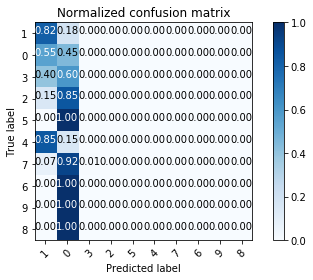

In [15]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

          1       0.61      0.82      0.70     50157
          0       0.57      0.44      0.49     42335
          3       0.00      0.00      0.00      4693
          2       0.00      0.00      0.00      2090
          5       0.00      0.00      0.00       358
          4       0.00      0.00      0.00       193
          7       0.00      0.00      0.00       149
          6       0.00      0.00      0.00        23
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.55      0.60      0.56    100000

accuracy:  0.59733


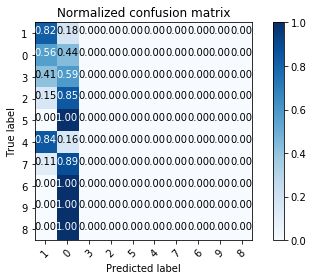

             precision    recall  f1-score   support

          1       0.61      0.82      0.70     50136
          0       0.56      0.43      0.49     42146
          3       0.00      0.00      0.00      4914
          2       0.00      0.00      0.00      2050
          5       0.00      0.00      0.00       404
          4       0.00      0.00      0.00       189
          7       0.00      0.00      0.00       141
          6       0.00      0.00      0.00        18
          8       0.00      0.00      0.00         2

avg / total       0.54      0.59      0.56    100000

accuracy:  0.59409


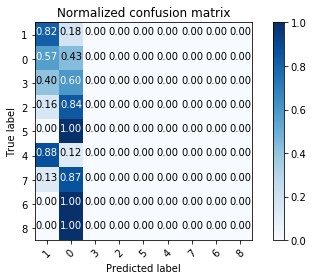

             precision    recall  f1-score   support

          1       0.61      0.82      0.70     50302
          0       0.56      0.44      0.49     42056
          3       0.00      0.00      0.00      4785
          2       0.00      0.00      0.00      2086
          5       0.00      0.00      0.00       394
          4       0.00      0.00      0.00       203
          7       0.00      0.00      0.00       148
          6       0.00      0.00      0.00        24
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.54      0.60      0.56    100000

accuracy:  0.59585


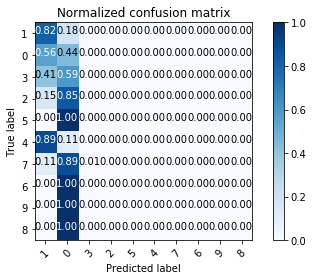

             precision    recall  f1-score   support

          1       0.61      0.83      0.70     49991
          0       0.57      0.43      0.49     42425
          3       0.00      0.00      0.00      4822
          2       0.00      0.00      0.00      2054
          5       0.00      0.00      0.00       368
          4       0.00      0.00      0.00       179
          7       0.00      0.00      0.00       142
          6       0.00      0.00      0.00        17
          8       0.00      0.00      0.00         2

avg / total       0.55      0.60      0.56    100000

accuracy:  0.59545


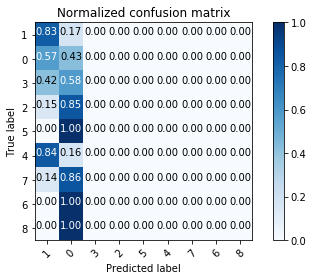

             precision    recall  f1-score   support

          1       0.61      0.82      0.70     50117
          0       0.56      0.43      0.49     42278
          3       0.00      0.00      0.00      4800
          2       0.00      0.00      0.00      2094
          5       0.00      0.00      0.00       382
          4       0.00      0.00      0.00       168
          7       0.00      0.00      0.00       133
          6       0.00      0.00      0.00        26
          8       0.00      0.00      0.00         2

avg / total       0.54      0.59      0.56    100000

accuracy:  0.59443


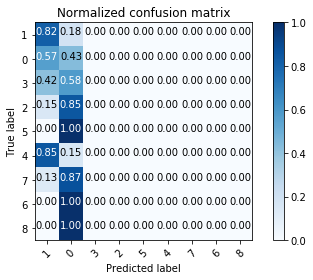

             precision    recall  f1-score   support

          1       0.61      0.82      0.70     50176
          0       0.56      0.43      0.49     42203
          3       0.00      0.00      0.00      4807
          2       0.00      0.00      0.00      2046
          5       0.00      0.00      0.00       380
          4       0.00      0.00      0.00       214
          7       0.00      0.00      0.00       157
          6       0.00      0.00      0.00        15
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.54      0.59      0.56    100000

accuracy:  0.59482


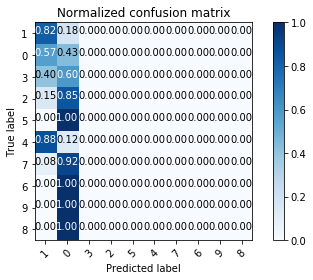

             precision    recall  f1-score   support

          1       0.61      0.82      0.70     49879
          0       0.57      0.43      0.49     42497
          3       0.00      0.00      0.00      4812
          2       0.00      0.00      0.00      2072
          5       0.00      0.00      0.00       381
          4       0.00      0.00      0.00       188
          7       0.00      0.00      0.00       151
          6       0.00      0.00      0.00        17
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.54      0.59      0.56    100000

accuracy:  0.59274


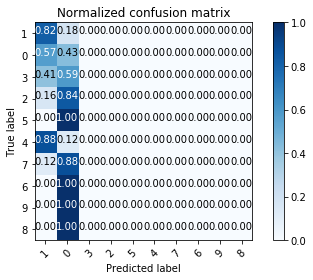

             precision    recall  f1-score   support

          1       0.61      0.82      0.70     50414
          0       0.56      0.44      0.49     41984
          3       0.00      0.00      0.00      4795
          2       0.00      0.00      0.00      2068
          5       0.00      0.00      0.00       381
          4       0.00      0.00      0.00       194
          7       0.00      0.00      0.00       139
          6       0.00      0.00      0.00        24
          8       0.00      0.00      0.00         1

avg / total       0.55      0.60      0.56    100000

accuracy:  0.59677


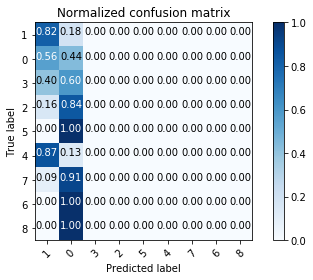

             precision    recall  f1-score   support

          1       0.61      0.82      0.70     50177
          0       0.56      0.44      0.49     42153
          3       0.00      0.00      0.00      4849
          2       0.00      0.00      0.00      2121
          5       0.00      0.00      0.00       358
          4       0.00      0.00      0.00       180
          7       0.00      0.00      0.00       142
          6       0.00      0.00      0.00        18
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.54      0.59      0.56    100000

accuracy:  0.59458


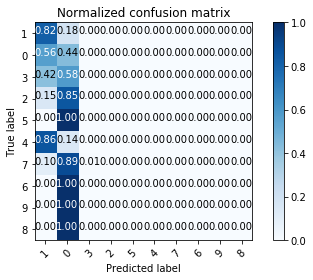

             precision    recall  f1-score   support

          1       0.61      0.82      0.70     50116
          0       0.57      0.43      0.49     42328
          3       0.00      0.00      0.00      4758
          2       0.00      0.00      0.00      2019
          5       0.00      0.00      0.00       404
          4       0.00      0.00      0.00       202
          7       0.00      0.00      0.00       148
          6       0.00      0.00      0.00        23
          8       0.00      0.00      0.00         2

avg / total       0.55      0.60      0.56    100000

accuracy:  0.59558


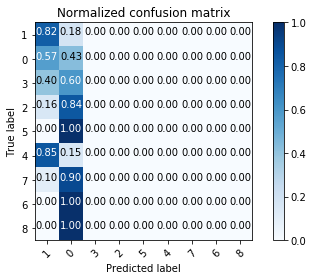

In [16]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=150, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

### Minkowski metric and k tunning

             precision    recall  f1-score   support

          1       0.62      0.63      0.63     50211
          0       0.50      0.50      0.50     42120
          3       0.16      0.16      0.16      4829
          2       0.14      0.13      0.14      2091
          5       0.10      0.10      0.10       385
          4       0.02      0.02      0.02       192
          7       0.03      0.03      0.03       149
          6       0.04      0.05      0.05        21
          8       0.00      0.00      0.00         2

avg / total       0.53      0.53      0.53    100000

accuracy:  0.53488


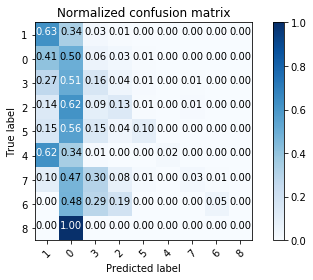

             precision    recall  f1-score   support

          1       0.62      0.63      0.62     50082
          0       0.50      0.50      0.50     42361
          3       0.16      0.16      0.16      4778
          2       0.14      0.13      0.13      2049
          5       0.09      0.09      0.09       377
          4       0.02      0.03      0.03       190
          7       0.03      0.03      0.03       141
          6       0.06      0.10      0.07        20
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.53      0.54      0.54    100000

accuracy:  0.53591


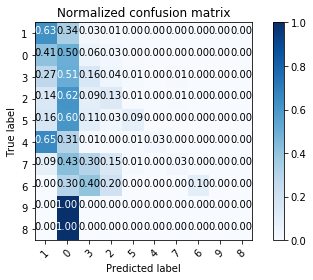

             precision    recall  f1-score   support

          1       0.62      0.63      0.63     50168
          0       0.50      0.50      0.50     42152
          3       0.16      0.15      0.16      4875
          2       0.13      0.12      0.13      2053
          5       0.10      0.10      0.10       379
          4       0.02      0.02      0.02       207
          7       0.04      0.04      0.04       137
          6       0.07      0.04      0.05        27
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.54      0.54      0.54    100000

accuracy:  0.53716


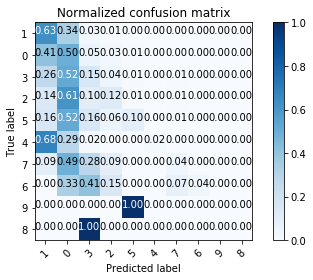

set(['1', '0', '3', '2', '5', '4', '7', '6', '8'])
             precision    recall  f1-score   support

          1       0.62      0.63      0.63     50125
          0       0.50      0.50      0.50     42329
          3       0.16      0.16      0.16      4732
          2       0.13      0.12      0.13      2087
          5       0.11      0.10      0.10       383
          4       0.02      0.02      0.02       175
          7       0.02      0.02      0.02       153
          6       0.03      0.07      0.04        14
          8       0.00      0.00      0.00         2

avg / total       0.53      0.54      0.53    100000

accuracy:  0.53509


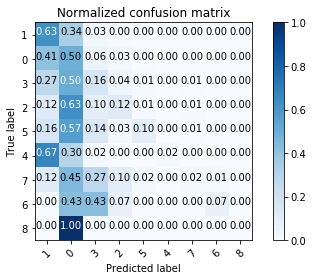

             precision    recall  f1-score   support

          1       0.62      0.63      0.62     49964
          0       0.50      0.49      0.50     42500
          3       0.16      0.16      0.16      4774
          2       0.14      0.15      0.14      2039
          5       0.07      0.08      0.08       359
          4       0.05      0.04      0.04       203
          7       0.01      0.01      0.01       141
          6       0.10      0.18      0.12        17
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.53      0.53      0.53    100000

accuracy:  0.53326


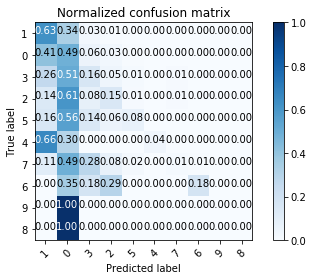

set(['1', '0', '3', '2', '5', '4', '7', '6', '8'])
             precision    recall  f1-score   support

          1       0.62      0.63      0.63     50329
          0       0.50      0.49      0.49     41981
          3       0.17      0.17      0.17      4833
          2       0.15      0.14      0.14      2101
          5       0.11      0.09      0.10       403
          4       0.04      0.04      0.04       179
          7       0.03      0.03      0.03       149
          6       0.11      0.08      0.10        24
          8       0.00      0.00      0.00         1

avg / total       0.53      0.53      0.53    100000

accuracy:  0.53487


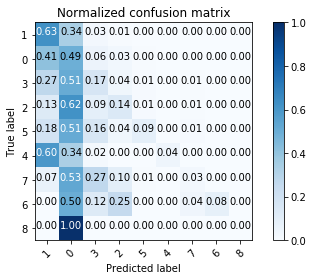

             precision    recall  f1-score   support

          1       0.62      0.63      0.63     49954
          0       0.50      0.50      0.50     42357
          3       0.16      0.15      0.15      4861
          2       0.13      0.13      0.13      2105
          5       0.12      0.12      0.12       379
          4       0.02      0.02      0.02       190
          7       0.03      0.04      0.04       133
          6       0.00      0.00      0.00        18
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.53      0.53      0.53    100000

accuracy:  0.53428


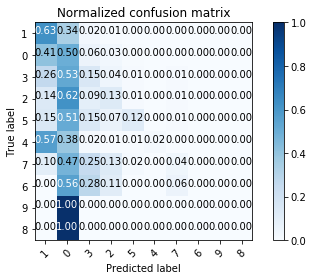

             precision    recall  f1-score   support

          1       0.63      0.63      0.63     50339
          0       0.50      0.50      0.50     42124
          3       0.16      0.16      0.16      4746
          2       0.13      0.12      0.13      2035
          5       0.10      0.09      0.10       383
          4       0.02      0.02      0.02       192
          7       0.04      0.03      0.03       157
          6       0.00      0.00      0.00        23
          8       0.00      0.00      0.00         1

avg / total       0.54      0.54      0.54    100000

accuracy:  0.53761


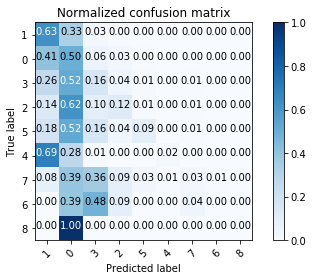

             precision    recall  f1-score   support

          1       0.62      0.63      0.63     50071
          0       0.50      0.49      0.50     42408
          3       0.16      0.16      0.16      4710
          2       0.13      0.12      0.13      2090
          5       0.09      0.08      0.09       366
          4       0.03      0.03      0.03       196
          7       0.01      0.01      0.01       138
          6       0.04      0.06      0.05        18
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.53      0.54      0.54    100000

accuracy:  0.53567


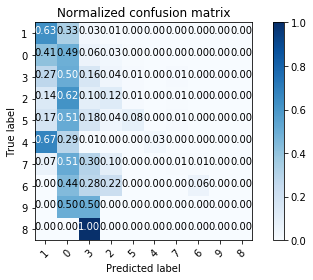

             precision    recall  f1-score   support

          1       0.62      0.63      0.62     50222
          0       0.50      0.50      0.50     42073
          3       0.17      0.16      0.16      4897
          2       0.13      0.12      0.13      2050
          5       0.10      0.09      0.09       396
          4       0.03      0.03      0.03       186
          7       0.01      0.01      0.01       152
          6       0.11      0.09      0.10        23
          8       0.00      0.00      0.00         1

avg / total       0.53      0.53      0.53    100000

accuracy:  0.53363


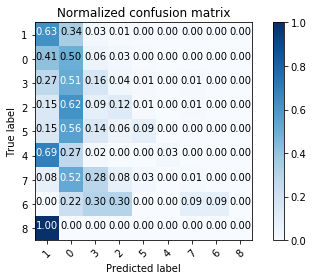

In [17]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

          1       0.61      0.73      0.67     50120
          0       0.53      0.49      0.51     42336
          3       0.24      0.04      0.07      4768
          2       0.25      0.03      0.05      2006
          5       0.13      0.01      0.01       416
          4       0.00      0.00      0.00       186
          7       0.00      0.00      0.00       144
          6       0.00      0.00      0.00        23
          8       0.00      0.00      0.00         1

avg / total       0.55      0.58      0.55    100000

accuracy:  0.57718


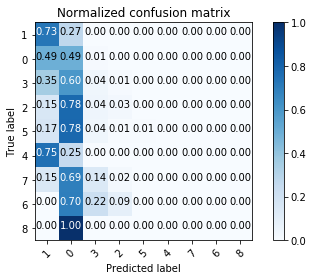

             precision    recall  f1-score   support

          1       0.61      0.73      0.67     50173
          0       0.53      0.50      0.51     42145
          3       0.27      0.04      0.07      4839
          2       0.22      0.02      0.04      2134
          5       0.05      0.01      0.01       346
          4       0.00      0.00      0.00       196
          7       0.00      0.00      0.00       146
          6       0.00      0.00      0.00        18
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.55      0.58      0.55    100000

accuracy:  0.57624


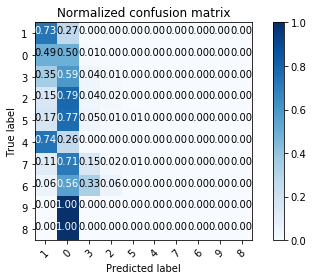

             precision    recall  f1-score   support

          1       0.61      0.73      0.67     50099
          0       0.53      0.49      0.51     42314
          3       0.28      0.04      0.07      4750
          2       0.22      0.02      0.04      2082
          5       0.12      0.01      0.02       400
          4       0.00      0.00      0.00       184
          7       0.00      0.00      0.00       148
          6       0.00      0.00      0.00        22
          8       0.00      0.00      0.00         1

avg / total       0.55      0.58      0.55    100000

accuracy:  0.57642


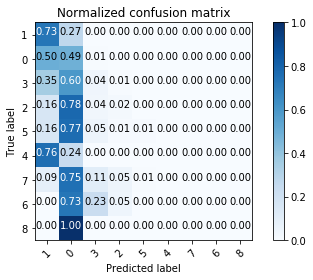

             precision    recall  f1-score   support

          1       0.61      0.72      0.66     50194
          0       0.53      0.49      0.51     42167
          3       0.25      0.04      0.06      4857
          2       0.20      0.02      0.04      2058
          5       0.09      0.01      0.02       362
          4       0.00      0.00      0.00       198
          7       0.25      0.01      0.01       142
          6       0.00      0.00      0.00        19
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.54      0.57      0.55    100000

accuracy:  0.57291


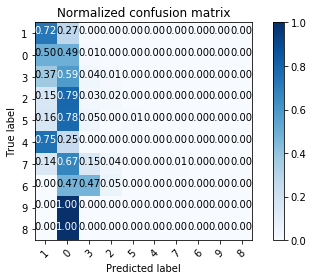

             precision    recall  f1-score   support

          1       0.61      0.73      0.67     50047
          0       0.53      0.49      0.51     42346
          3       0.24      0.04      0.06      4817
          2       0.23      0.02      0.04      2060
          5       0.14      0.01      0.02       375
          4       0.00      0.00      0.00       182
          7       0.00      0.00      0.00       155
          6       0.00      0.00      0.00        16
          8       0.00      0.00      0.00         2

avg / total       0.55      0.58      0.55    100000

accuracy:  0.57782


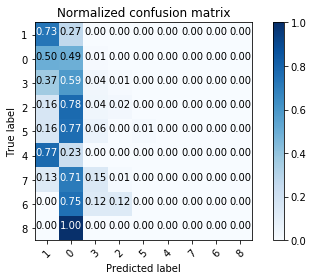

             precision    recall  f1-score   support

          1       0.61      0.72      0.66     50246
          0       0.53      0.50      0.51     42135
          3       0.26      0.04      0.07      4790
          2       0.18      0.02      0.03      2080
          5       0.08      0.01      0.01       387
          4       0.00      0.00      0.00       200
          7       0.17      0.01      0.01       135
          6       0.00      0.00      0.00        25
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.55      0.57      0.55    100000

accuracy:  0.57415


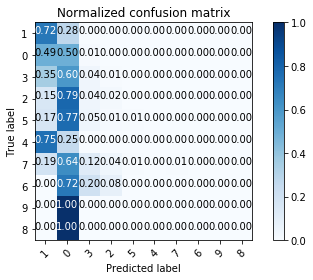

             precision    recall  f1-score   support

          1       0.61      0.72      0.66     50191
          0       0.53      0.50      0.51     42226
          3       0.23      0.03      0.05      4831
          2       0.23      0.02      0.04      2017
          5       0.03      0.00      0.00       386
          4       0.00      0.00      0.00       183
          7       1.00      0.01      0.01       147
          6       0.00      0.00      0.00        18
          8       0.00      0.00      0.00         1

avg / total       0.55      0.57      0.55    100000

accuracy:  0.57496


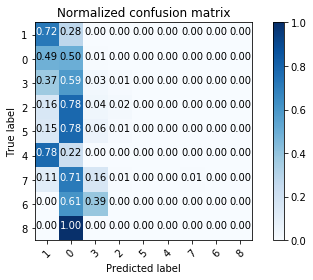

             precision    recall  f1-score   support

          1       0.61      0.73      0.67     50102
          0       0.53      0.49      0.51     42255
          3       0.24      0.04      0.06      4776
          2       0.23      0.02      0.04      2123
          5       0.17      0.01      0.02       376
          4       0.00      0.00      0.00       199
          7       0.00      0.00      0.00       143
          6       0.00      0.00      0.00        23
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.55      0.58      0.55    100000

accuracy:  0.57642


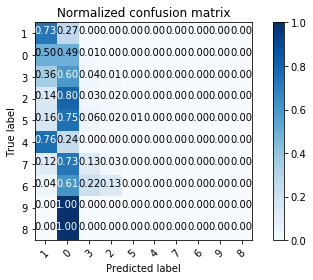

             precision    recall  f1-score   support

          1       0.61      0.73      0.67     50017
          0       0.53      0.49      0.51     42359
          3       0.27      0.04      0.07      4817
          2       0.24      0.03      0.05      2076
          5       0.11      0.01      0.02       379
          4       0.00      0.00      0.00       189
          7       0.33      0.01      0.01       142
          6       0.00      0.00      0.00        19
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.55      0.58      0.55    100000

accuracy:  0.577


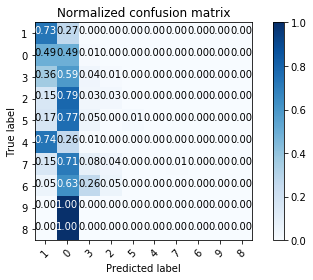

             precision    recall  f1-score   support

          1       0.61      0.72      0.67     50276
          0       0.53      0.50      0.51     42122
          3       0.26      0.04      0.07      4790
          2       0.22      0.02      0.04      2064
          5       0.11      0.01      0.02       383
          4       0.00      0.00      0.00       193
          7       0.33      0.01      0.01       148
          6       0.00      0.00      0.00        22
          8       0.00      0.00      0.00         2

avg / total       0.55      0.58      0.56    100000

accuracy:  0.5769


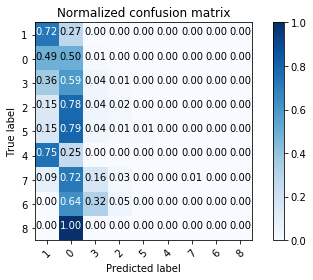

In [18]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

          1       0.62      0.79      0.69     50054
          0       0.56      0.47      0.51     42226
          3       0.33      0.02      0.04      4864
          2       0.31      0.01      0.02      2113
          5       0.00      0.00      0.00       379
          4       0.00      0.00      0.00       191
          7       0.00      0.00      0.00       153
          6       0.00      0.00      0.00        19
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.59549


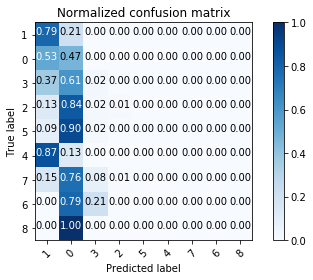

             precision    recall  f1-score   support

          1       0.62      0.78      0.69     50239
          0       0.56      0.47      0.51     42255
          3       0.32      0.02      0.04      4743
          2       0.25      0.01      0.02      2027
          5       0.00      0.00      0.00       383
          4       0.00      0.00      0.00       191
          7       0.00      0.00      0.00       137
          6       0.00      0.00      0.00        22
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.57      0.59      0.56    100000

accuracy:  0.59419


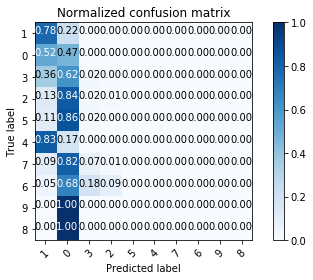

             precision    recall  f1-score   support

          1       0.62      0.79      0.69     50192
          0       0.55      0.47      0.51     42135
          3       0.27      0.02      0.04      4858
          2       0.32      0.01      0.02      2066
          5       0.11      0.00      0.01       362
          4       0.00      0.00      0.00       206
          7       0.00      0.00      0.00       164
          6       0.00      0.00      0.00        15
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.56      0.59      0.56    100000

accuracy:  0.59297


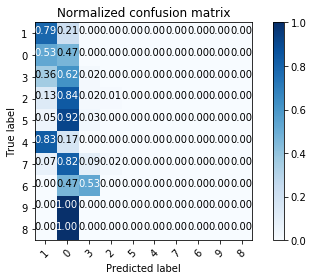

             precision    recall  f1-score   support

          1       0.62      0.79      0.69     50101
          0       0.56      0.47      0.51     42346
          3       0.26      0.02      0.03      4749
          2       0.24      0.01      0.02      2074
          5       0.00      0.00      0.00       400
          4       0.00      0.00      0.00       176
          7       0.00      0.00      0.00       126
          6       0.00      0.00      0.00        26
          8       0.00      0.00      0.00         2

avg / total       0.56      0.59      0.56    100000

accuracy:  0.59236


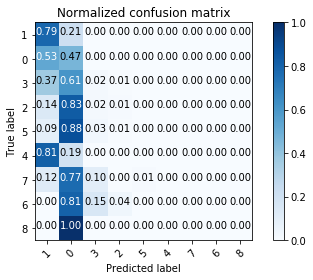

             precision    recall  f1-score   support

          1       0.62      0.79      0.69     50120
          0       0.55      0.47      0.51     42212
          3       0.28      0.02      0.04      4858
          2       0.20      0.01      0.01      2049
          5       0.17      0.00      0.00       405
          4       0.00      0.00      0.00       183
          7       0.00      0.00      0.00       146
          6       0.00      0.00      0.00        24
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.56      0.59      0.56    100000

accuracy:  0.5931


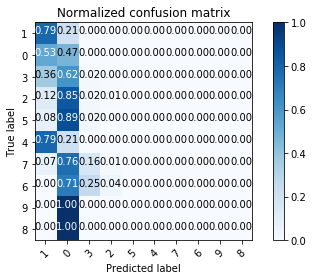

             precision    recall  f1-score   support

          1       0.62      0.79      0.69     50173
          0       0.56      0.47      0.51     42269
          3       0.26      0.02      0.03      4749
          2       0.15      0.00      0.01      2091
          5       0.00      0.00      0.00       357
          4       0.00      0.00      0.00       199
          7       0.00      0.00      0.00       144
          6       0.00      0.00      0.00        17
          8       0.00      0.00      0.00         1

avg / total       0.56      0.59      0.56    100000

accuracy:  0.59451


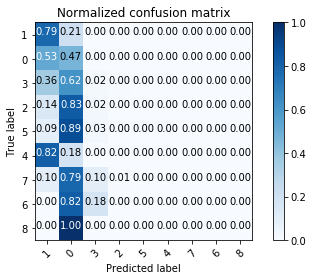

             precision    recall  f1-score   support

          1       0.62      0.78      0.69     50294
          0       0.55      0.47      0.51     42098
          3       0.28      0.02      0.04      4792
          2       0.30      0.01      0.01      2072
          5       0.00      0.00      0.00       401
          4       0.00      0.00      0.00       181
          7       0.00      0.00      0.00       142
          6       0.00      0.00      0.00        18
          8       0.00      0.00      0.00         2

avg / total       0.56      0.59      0.56    100000

accuracy:  0.59324


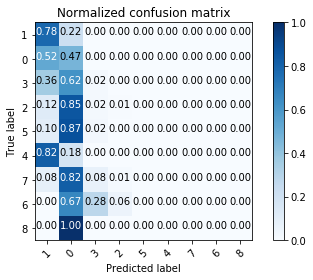

             precision    recall  f1-score   support

          1       0.61      0.79      0.69     49999
          0       0.56      0.46      0.50     42383
          3       0.34      0.02      0.04      4815
          2       0.30      0.01      0.02      2068
          5       0.00      0.00      0.00       361
          4       0.00      0.00      0.00       201
          7       0.00      0.00      0.00       148
          6       0.00      0.00      0.00        23
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.56      0.59      0.56    100000

accuracy:  0.59214


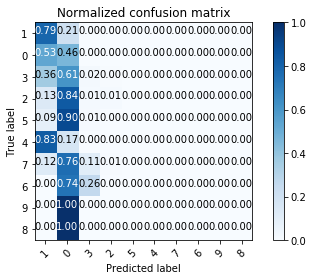

             precision    recall  f1-score   support

          1       0.62      0.79      0.69     50053
          0       0.56      0.47      0.51     42287
          3       0.30      0.02      0.04      4846
          2       0.29      0.01      0.02      2071
          5       0.25      0.00      0.01       366
          4       0.00      0.00      0.00       208
          7       0.00      0.00      0.00       148
          6       0.00      0.00      0.00        19
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.56      0.59      0.56    100000

accuracy:  0.59337


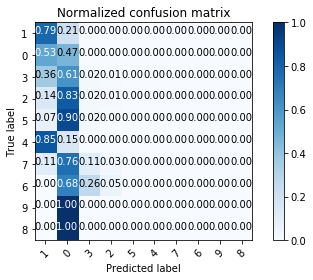

             precision    recall  f1-score   support

          1       0.62      0.78      0.69     50240
          0       0.55      0.47      0.51     42194
          3       0.27      0.02      0.04      4761
          2       0.28      0.01      0.02      2069
          5       0.40      0.01      0.01       396
          4       0.00      0.00      0.00       174
          7       0.00      0.00      0.00       142
          6       0.00      0.00      0.00        22
          8       0.00      0.00      0.00         2

avg / total       0.56      0.59      0.56    100000

accuracy:  0.5926


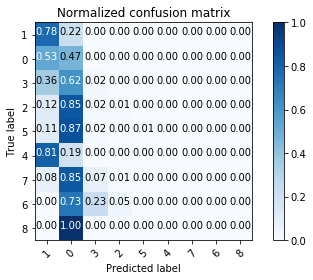

In [19]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

          1       0.62      0.77      0.69     50241
          0       0.55      0.49      0.52     42134
          3       0.29      0.01      0.02      4866
          2       0.11      0.00      0.00      2034
          5       0.00      0.00      0.00       391
          4       0.00      0.00      0.00       175
          7       0.00      0.00      0.00       138
          6       0.00      0.00      0.00        20
          9       0.00      0.00      0.00         1

avg / total       0.56      0.60      0.57    100000

accuracy:  0.5969


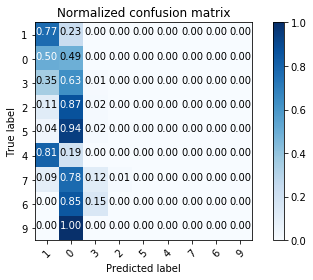

             precision    recall  f1-score   support

          1       0.62      0.78      0.69     50052
          0       0.56      0.49      0.52     42347
          3       0.35      0.01      0.02      4741
          2       0.33      0.00      0.01      2106
          5       0.00      0.00      0.00       371
          4       0.00      0.00      0.00       207
          7       0.00      0.00      0.00       152
          6       0.00      0.00      0.00        21
          8       0.00      0.00      0.00         3

avg / total       0.57      0.60      0.57    100000

accuracy:  0.59628


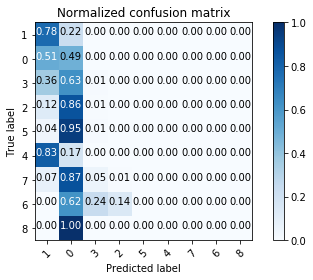

             precision    recall  f1-score   support

          1       0.62      0.78      0.69     49969
          0       0.56      0.49      0.52     42431
          3       0.32      0.01      0.02      4824
          2       0.46      0.01      0.01      2059
          5       0.00      0.00      0.00       391
          4       0.00      0.00      0.00       185
          7       0.00      0.00      0.00       117
          6       0.00      0.00      0.00        21
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.5958


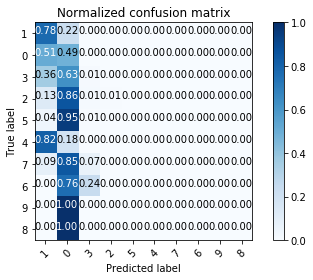

             precision    recall  f1-score   support

          1       0.63      0.77      0.69     50324
          0       0.55      0.50      0.52     42050
          3       0.26      0.01      0.02      4783
          2       0.21      0.00      0.01      2081
          5       0.00      0.00      0.00       371
          4       0.00      0.00      0.00       197
          7       0.00      0.00      0.00       173
          6       0.00      0.00      0.00        20
          8       0.00      0.00      0.00         1

avg / total       0.56      0.60      0.57    100000

accuracy:  0.59734


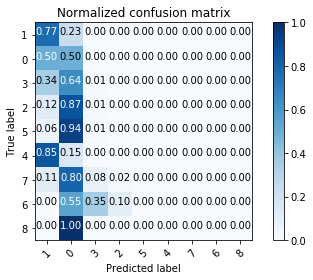

             precision    recall  f1-score   support

          1       0.63      0.77      0.69     50332
          0       0.55      0.50      0.52     42076
          3       0.35      0.01      0.02      4766
          2       0.30      0.00      0.01      2063
          5       0.00      0.00      0.00       411
          4       0.00      0.00      0.00       176
          7       0.00      0.00      0.00       157
          6       0.00      0.00      0.00        17
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.59778


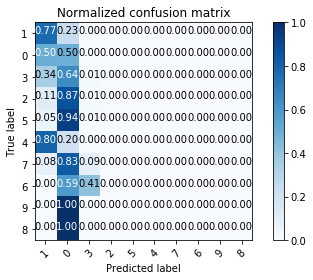

             precision    recall  f1-score   support

          1       0.62      0.78      0.69     49961
          0       0.56      0.49      0.52     42405
          3       0.28      0.01      0.02      4841
          2       0.31      0.00      0.01      2077
          5       0.00      0.00      0.00       351
          4       0.00      0.00      0.00       206
          7       0.00      0.00      0.00       133
          6       0.00      0.00      0.00        24
          8       0.00      0.00      0.00         2

avg / total       0.57      0.60      0.57    100000

accuracy:  0.59542


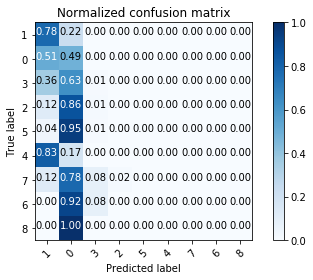

             precision    recall  f1-score   support

          1       0.63      0.77      0.69     50297
          0       0.55      0.50      0.53     41993
          3       0.38      0.01      0.02      4845
          2       0.27      0.00      0.01      2129
          5       0.00      0.00      0.00       363
          4       0.00      0.00      0.00       193
          7       0.00      0.00      0.00       153
          6       0.00      0.00      0.00        27

avg / total       0.57      0.60      0.57    100000

accuracy:  0.59877


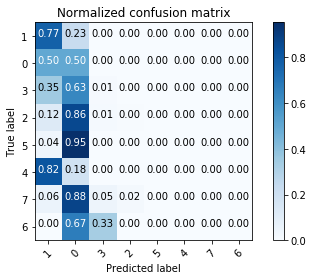

             precision    recall  f1-score   support

          1       0.62      0.78      0.69     49996
          0       0.56      0.49      0.52     42488
          3       0.37      0.01      0.02      4762
          2       0.29      0.00      0.01      2011
          5       0.00      0.00      0.00       399
          4       0.00      0.00      0.00       189
          7       0.00      0.00      0.00       137
          6       0.00      0.00      0.00        14
          9       0.00      0.00      0.00         3
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.59628


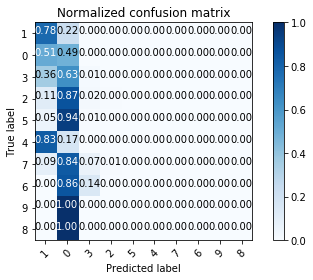

             precision    recall  f1-score   support

          1       0.62      0.77      0.69     50186
          0       0.55      0.49      0.52     42238
          3       0.34      0.01      0.02      4795
          2       0.21      0.00      0.00      2030
          5       0.00      0.00      0.00       374
          4       0.00      0.00      0.00       201
          7       0.00      0.00      0.00       151
          6       0.00      0.00      0.00        25

avg / total       0.57      0.60      0.57    100000

accuracy:  0.59626


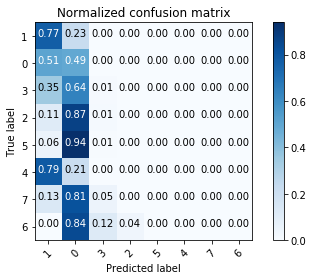

             precision    recall  f1-score   support

          1       0.62      0.78      0.69     50107
          0       0.55      0.49      0.52     42243
          3       0.35      0.01      0.03      4812
          2       0.25      0.00      0.01      2110
          5       0.00      0.00      0.00       388
          4       0.00      0.00      0.00       181
          7       0.00      0.00      0.00       139
          6       0.00      0.00      0.00        16
          9       0.00      0.00      0.00         3
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.59595


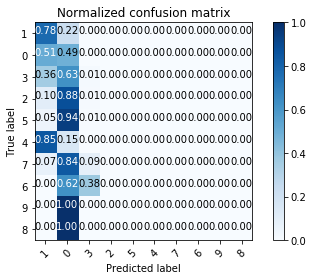

In [20]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

          1       0.62      0.79      0.70     50126
          0       0.56      0.48      0.52     42299
          3       0.33      0.01      0.02      4823
          2       0.23      0.00      0.00      2048
          5       0.00      0.00      0.00       364
          4       0.00      0.00      0.00       184
          7       0.00      0.00      0.00       136
          6       0.00      0.00      0.00        18
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60074


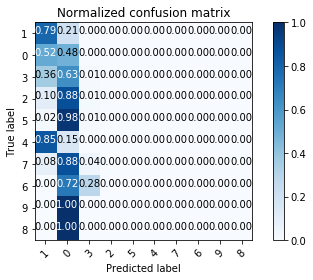

             precision    recall  f1-score   support

          1       0.62      0.79      0.70     50167
          0       0.56      0.48      0.52     42182
          3       0.34      0.01      0.01      4784
          2       0.27      0.00      0.00      2092
          5       0.00      0.00      0.00       398
          4       0.00      0.00      0.00       198
          7       0.00      0.00      0.00       154
          6       0.00      0.00      0.00        23
          8       0.00      0.00      0.00         2

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60123


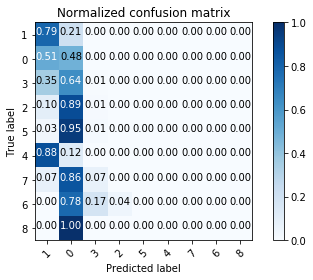

             precision    recall  f1-score   support

          1       0.62      0.79      0.70     50068
          0       0.56      0.48      0.51     42222
          3       0.37      0.01      0.01      4904
          2       0.20      0.00      0.00      2070
          5       0.00      0.00      0.00       380
          4       0.00      0.00      0.00       191
          7       0.00      0.00      0.00       150
          6       0.00      0.00      0.00        12
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.59863


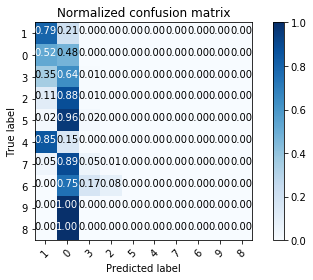

             precision    recall  f1-score   support

          1       0.62      0.78      0.70     50225
          0       0.56      0.49      0.52     42259
          3       0.35      0.01      0.02      4703
          2       0.29      0.00      0.00      2070
          5       0.00      0.00      0.00       382
          4       0.00      0.00      0.00       191
          7       0.00      0.00      0.00       140
          6       0.00      0.00      0.00        29
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60061


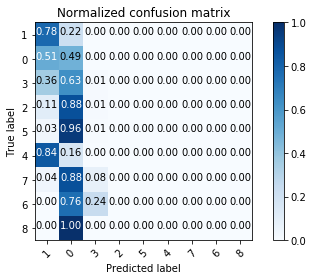

             precision    recall  f1-score   support

          1       0.62      0.79      0.70     50290
          0       0.56      0.48      0.52     42032
          3       0.41      0.01      0.02      4857
          2       0.50      0.00      0.00      2072
          5       0.00      0.00      0.00       374
          4       0.00      0.00      0.00       206
          7       0.00      0.00      0.00       147
          6       0.00      0.00      0.00        21
          8       0.00      0.00      0.00         1

avg / total       0.58      0.60      0.57    100000

accuracy:  0.59953


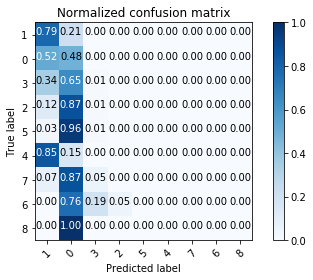

             precision    recall  f1-score   support

          1       0.62      0.79      0.70     50003
          0       0.57      0.48      0.52     42449
          3       0.43      0.01      0.02      4750
          2       0.17      0.00      0.00      2068
          5       0.00      0.00      0.00       388
          4       0.00      0.00      0.00       176
          7       0.00      0.00      0.00       143
          6       0.00      0.00      0.00        20
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.6011


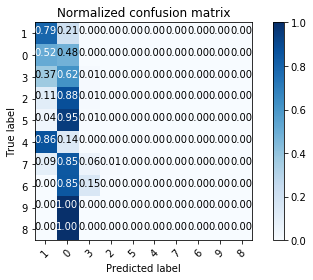

             precision    recall  f1-score   support

          1       0.62      0.79      0.70     50157
          0       0.56      0.48      0.52     42269
          3       0.34      0.01      0.01      4742
          2       0.33      0.00      0.00      2081
          5       0.00      0.00      0.00       396
          4       0.00      0.00      0.00       194
          7       0.00      0.00      0.00       142
          6       0.00      0.00      0.00        18
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60005


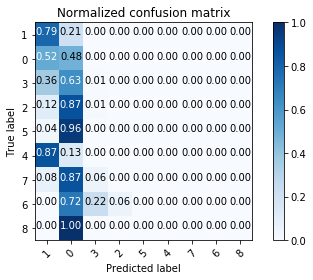

             precision    recall  f1-score   support

          1       0.63      0.79      0.70     50136
          0       0.56      0.49      0.52     42212
          3       0.33      0.01      0.01      4865
          2       0.24      0.00      0.00      2059
          5       0.00      0.00      0.00       366
          4       0.00      0.00      0.00       188
          7       0.00      0.00      0.00       148
          6       0.00      0.00      0.00        23
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60186


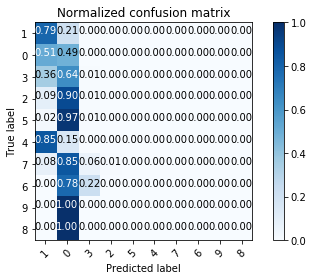

             precision    recall  f1-score   support

          1       0.62      0.80      0.70     49936
          0       0.57      0.48      0.52     42494
          3       0.34      0.01      0.01      4757
          2       0.44      0.00      0.00      2072
          5       0.00      0.00      0.00       395
          4       0.00      0.00      0.00       181
          7       0.00      0.00      0.00       141
          6       0.00      0.00      0.00        22
          8       0.00      0.00      0.00         2

avg / total       0.58      0.60      0.57    100000

accuracy:  0.60019


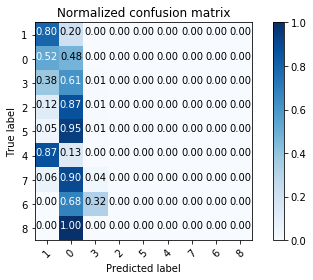

             precision    recall  f1-score   support

          1       0.63      0.79      0.70     50357
          0       0.56      0.50      0.53     41987
          3       0.40      0.01      0.01      4850
          2       0.42      0.00      0.00      2068
          5       0.00      0.00      0.00       367
          4       0.00      0.00      0.00       201
          7       0.00      0.00      0.00       149
          6       0.00      0.00      0.00        19
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.58      0.60      0.57    100000

accuracy:  0.60494


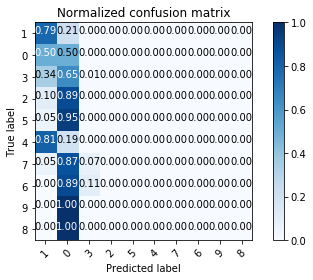

In [21]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

          1       0.62      0.79      0.70     50208
          0       0.56      0.48      0.52     42151
          3       0.45      0.00      0.01      4817
          2       0.00      0.00      0.00      2111
          5       0.00      0.00      0.00       381
          4       0.00      0.00      0.00       179
          7       0.00      0.00      0.00       139
          6       0.00      0.00      0.00        12
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60054


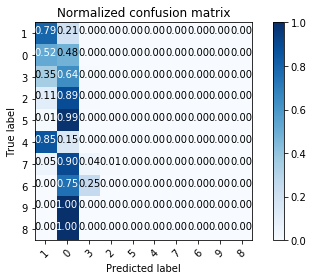

             precision    recall  f1-score   support

          1       0.62      0.80      0.70     50085
          0       0.57      0.48      0.52     42330
          3       0.27      0.00      0.01      4790
          2       0.67      0.00      0.00      2029
          5       0.00      0.00      0.00       381
          4       0.00      0.00      0.00       203
          7       0.00      0.00      0.00       151
          6       0.00      0.00      0.00        29
          8       0.00      0.00      0.00         2

avg / total       0.58      0.60      0.57    100000

accuracy:  0.60364


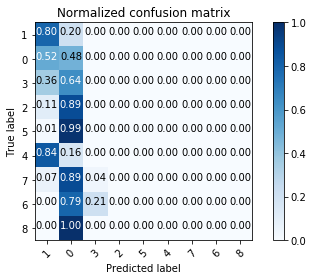

             precision    recall  f1-score   support

          1       0.62      0.80      0.70     50014
          0       0.57      0.47      0.52     42384
          3       0.41      0.00      0.01      4827
          2       0.00      0.00      0.00      2045
          5       0.00      0.00      0.00       366
          4       0.00      0.00      0.00       191
          7       0.00      0.00      0.00       149
          6       0.00      0.00      0.00        23
          9       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60117


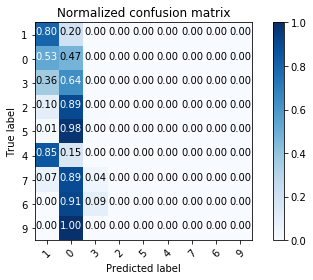

             precision    recall  f1-score   support

          1       0.63      0.79      0.70     50279
          0       0.56      0.48      0.52     42097
          3       0.41      0.01      0.01      4780
          2       0.00      0.00      0.00      2095
          5       0.00      0.00      0.00       396
          4       0.00      0.00      0.00       191
          7       0.00      0.00      0.00       141
          6       0.00      0.00      0.00        18
          8       0.00      0.00      0.00         3

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60269


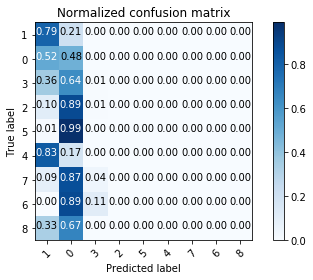

             precision    recall  f1-score   support

          1       0.62      0.80      0.70     50185
          0       0.56      0.48      0.52     42279
          3       0.37      0.00      0.01      4811
          2       0.33      0.00      0.00      2000
          5       0.00      0.00      0.00       368
          4       0.00      0.00      0.00       198
          7       0.00      0.00      0.00       136
          6       0.00      0.00      0.00        20
          8       0.00      0.00      0.00         3

avg / total       0.58      0.60      0.57    100000

accuracy:  0.60143


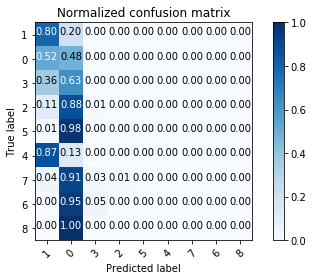

             precision    recall  f1-score   support

          1       0.62      0.80      0.70     50108
          0       0.56      0.48      0.52     42202
          3       0.35      0.00      0.01      4796
          2       0.00      0.00      0.00      2140
          5       0.00      0.00      0.00       394
          4       0.00      0.00      0.00       184
          7       0.00      0.00      0.00       154
          6       0.00      0.00      0.00        21
          9       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60262


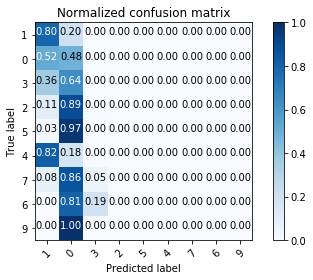

             precision    recall  f1-score   support

          1       0.63      0.79      0.70     50248
          0       0.56      0.48      0.52     42144
          3       0.34      0.00      0.01      4807
          2       1.00      0.00      0.00      2064
          5       0.00      0.00      0.00       381
          4       0.00      0.00      0.00       197
          7       0.00      0.00      0.00       141
          6       0.00      0.00      0.00        17
          8       0.00      0.00      0.00         1

avg / total       0.59      0.60      0.57    100000

accuracy:  0.60317


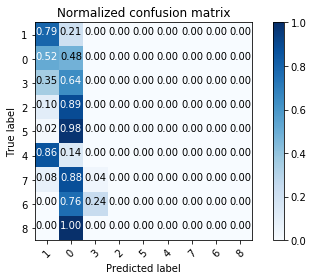

             precision    recall  f1-score   support

          1       0.62      0.80      0.70     50045
          0       0.57      0.48      0.52     42337
          3       0.44      0.01      0.01      4800
          2       0.00      0.00      0.00      2076
          5       0.00      0.00      0.00       381
          4       0.00      0.00      0.00       185
          7       0.00      0.00      0.00       149
          6       0.00      0.00      0.00        24
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60191


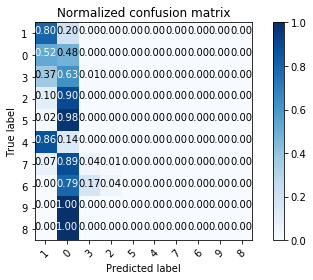

             precision    recall  f1-score   support

          1       0.62      0.80      0.70     49981
          0       0.56      0.48      0.52     42334
          3       0.37      0.00      0.01      4834
          2       0.29      0.00      0.00      2095
          5       0.00      0.00      0.00       387
          4       0.00      0.00      0.00       204
          7       0.00      0.00      0.00       140
          6       0.00      0.00      0.00        24
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60119


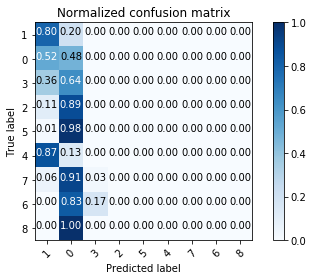

             precision    recall  f1-score   support

          1       0.63      0.79      0.70     50312
          0       0.56      0.48      0.52     42147
          3       0.41      0.01      0.01      4773
          2       0.00      0.00      0.00      2045
          5       0.00      0.00      0.00       375
          4       0.00      0.00      0.00       178
          7       0.00      0.00      0.00       150
          6       0.00      0.00      0.00        17
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60301


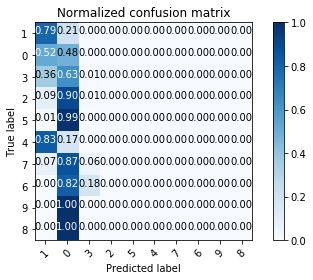

In [22]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

          1       0.62      0.81      0.70     50096
          0       0.57      0.47      0.52     42285
          3       0.35      0.00      0.00      4766
          2       0.00      0.00      0.00      2094
          5       0.00      0.00      0.00       400
          4       0.00      0.00      0.00       195
          7       0.00      0.00      0.00       147
          6       0.00      0.00      0.00        17

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60464


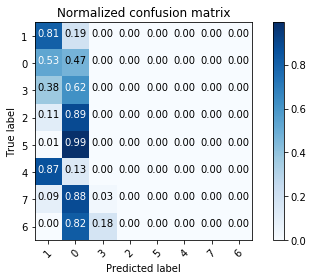

             precision    recall  f1-score   support

          1       0.62      0.81      0.70     50197
          0       0.57      0.47      0.52     42196
          3       0.47      0.00      0.00      4841
          2       0.00      0.00      0.00      2046
          5       0.00      0.00      0.00       362
          4       0.00      0.00      0.00       187
          7       0.00      0.00      0.00       143
          6       0.00      0.00      0.00        24
          9       0.00      0.00      0.00         3
          8       0.00      0.00      0.00         1

avg / total       0.58      0.60      0.57    100000

accuracy:  0.60375


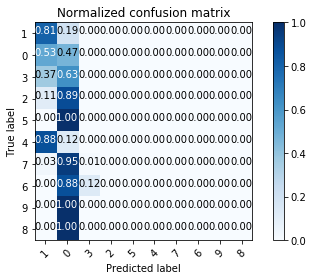

             precision    recall  f1-score   support

          1       0.62      0.81      0.70     50180
          0       0.57      0.47      0.51     42149
          3       0.50      0.00      0.00      4886
          2       0.00      0.00      0.00      2059
          5       0.00      0.00      0.00       373
          4       0.00      0.00      0.00       181
          7       0.00      0.00      0.00       151
          6       0.00      0.00      0.00        20
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60216


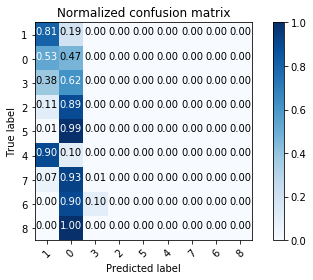

             precision    recall  f1-score   support

          1       0.62      0.80      0.70     50113
          0       0.57      0.47      0.51     42332
          3       0.31      0.00      0.00      4721
          2       0.00      0.00      0.00      2081
          5       0.00      0.00      0.00       389
          4       0.00      0.00      0.00       201
          7       0.00      0.00      0.00       139
          6       0.00      0.00      0.00        21
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60195


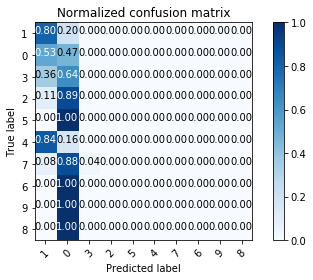

             precision    recall  f1-score   support

          1       0.62      0.80      0.70     50136
          0       0.57      0.47      0.52     42240
          3       0.42      0.00      0.00      4827
          2       0.00      0.00      0.00      2063
          5       0.00      0.00      0.00       367
          4       0.00      0.00      0.00       193
          7       0.00      0.00      0.00       146
          6       0.00      0.00      0.00        25
          8       0.00      0.00      0.00         3

avg / total       0.57      0.60      0.57    100000

accuracy:  0.6028


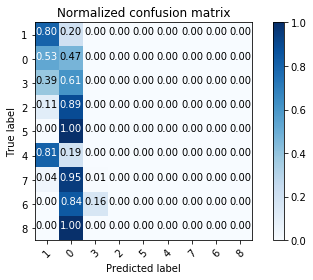

             precision    recall  f1-score   support

          1       0.62      0.81      0.70     50157
          0       0.57      0.47      0.51     42241
          3       0.42      0.00      0.00      4780
          2       0.00      0.00      0.00      2077
          5       0.00      0.00      0.00       395
          4       0.00      0.00      0.00       189
          7       0.00      0.00      0.00       144
          6       0.00      0.00      0.00        16
          9       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60303


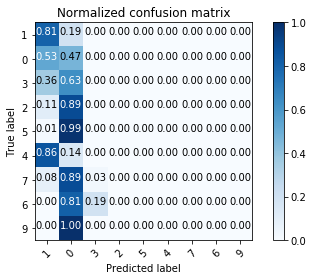

             precision    recall  f1-score   support

          1       0.62      0.80      0.70     50259
          0       0.56      0.47      0.51     42051
          3       0.36      0.00      0.00      4819
          2       0.00      0.00      0.00      2146
          5       0.00      0.00      0.00       390
          4       0.00      0.00      0.00       175
          7       0.00      0.00      0.00       146
          6       0.00      0.00      0.00        14

avg / total       0.57      0.60      0.57    100000

accuracy:  0.6022


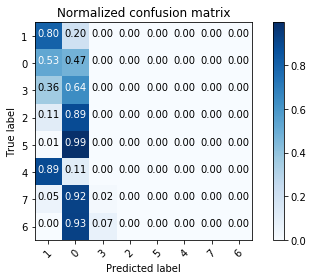

             precision    recall  f1-score   support

          1       0.62      0.81      0.70     50034
          0       0.57      0.47      0.51     42430
          3       0.53      0.00      0.00      4788
          2       0.00      0.00      0.00      1994
          5       0.00      0.00      0.00       372
          4       0.00      0.00      0.00       207
          7       0.00      0.00      0.00       144
          6       0.00      0.00      0.00        27
          9       0.00      0.00      0.00         3
          8       0.00      0.00      0.00         1

avg / total       0.58      0.60      0.57    100000

accuracy:  0.60323


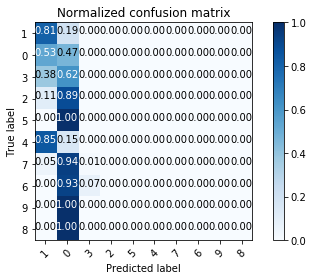

             precision    recall  f1-score   support

          1       0.62      0.80      0.70     50214
          0       0.57      0.47      0.52     42182
          3       0.45      0.00      0.00      4809
          2       0.00      0.00      0.00      2053
          5       0.00      0.00      0.00       390
          4       0.00      0.00      0.00       195
          7       0.00      0.00      0.00       135
          6       0.00      0.00      0.00        19
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60394


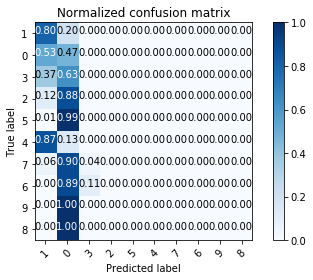

             precision    recall  f1-score   support

          1       0.62      0.81      0.70     50079
          0       0.57      0.47      0.51     42299
          3       0.25      0.00      0.00      4798
          2       0.00      0.00      0.00      2087
          5       0.00      0.00      0.00       372
          4       0.00      0.00      0.00       187
          7       0.00      0.00      0.00       155
          6       0.00      0.00      0.00        22
          8       0.00      0.00      0.00         1

avg / total       0.56      0.60      0.57    100000

accuracy:  0.60285


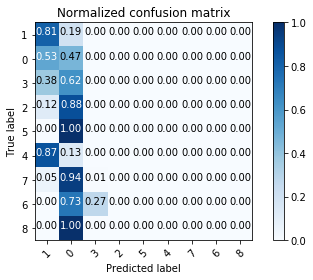

In [23]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

          1       0.61      0.82      0.70     50116
          0       0.57      0.45      0.50     42271
          3       0.00      0.00      0.00      4767
          2       0.00      0.00      0.00      2098
          5       0.00      0.00      0.00       398
          4       0.00      0.00      0.00       191
          7       0.00      0.00      0.00       138
          6       0.00      0.00      0.00        18
          8       0.00      0.00      0.00         3

avg / total       0.55      0.60      0.56    100000

accuracy:  0.5988


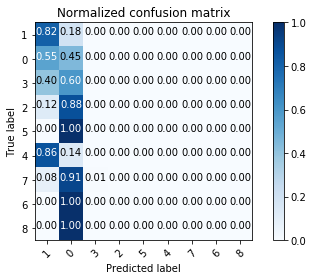

             precision    recall  f1-score   support

          1       0.62      0.82      0.70     50177
          0       0.57      0.45      0.50     42210
          3       0.00      0.00      0.00      4840
          2       0.00      0.00      0.00      2042
          5       0.00      0.00      0.00       364
          4       0.00      0.00      0.00       191
          7       0.00      0.00      0.00       152
          6       0.00      0.00      0.00        23
          9       0.00      0.00      0.00         1

avg / total       0.55      0.60      0.56    100000

accuracy:  0.59904


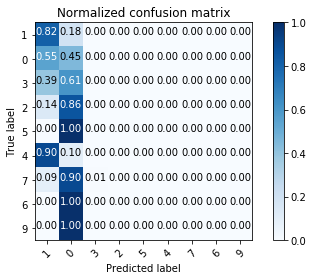

             precision    recall  f1-score   support

          1       0.62      0.82      0.70     50138
          0       0.57      0.45      0.50     42305
          3       0.50      0.00      0.00      4777
          2       0.00      0.00      0.00      2043
          5       0.00      0.00      0.00       375
          4       0.00      0.00      0.00       202
          7       0.00      0.00      0.00       142
          6       0.00      0.00      0.00        17
          9       0.00      0.00      0.00         1

avg / total       0.57      0.60      0.57    100000

accuracy:  0.60091


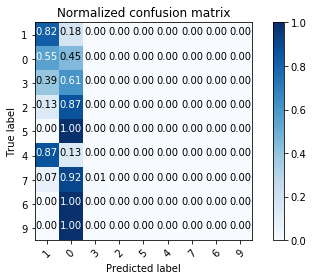

             precision    recall  f1-score   support

          1       0.62      0.81      0.70     50155
          0       0.56      0.46      0.50     42176
          3       0.67      0.00      0.00      4830
          2       0.00      0.00      0.00      2097
          5       0.00      0.00      0.00       387
          4       0.00      0.00      0.00       180
          7       0.00      0.00      0.00       148
          6       0.00      0.00      0.00        24
          8       0.00      0.00      0.00         3

avg / total       0.58      0.60      0.56    100000

accuracy:  0.59837


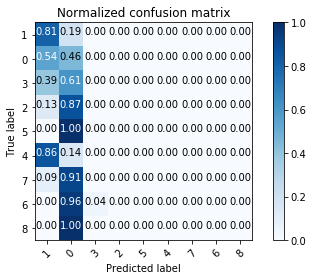

             precision    recall  f1-score   support

          1       0.62      0.82      0.70     50226
          0       0.57      0.45      0.50     42162
          3       0.25      0.00      0.00      4850
          2       0.00      0.00      0.00      2010
          5       0.00      0.00      0.00       389
          4       0.00      0.00      0.00       198
          7       0.00      0.00      0.00       144
          6       0.00      0.00      0.00        20
          8       0.00      0.00      0.00         1

avg / total       0.56      0.60      0.57    100000

accuracy:  0.60041


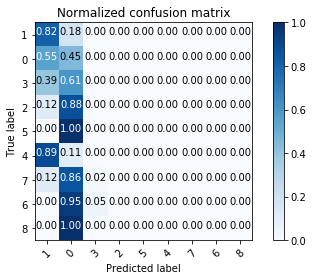

             precision    recall  f1-score   support

          1       0.61      0.82      0.70     50067
          0       0.57      0.45      0.50     42319
          3       0.00      0.00      0.00      4757
          2       0.00      0.00      0.00      2130
          5       0.00      0.00      0.00       373
          4       0.00      0.00      0.00       184
          7       0.00      0.00      0.00       146
          6       0.00      0.00      0.00        21
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.55      0.60      0.56    100000

accuracy:  0.59837


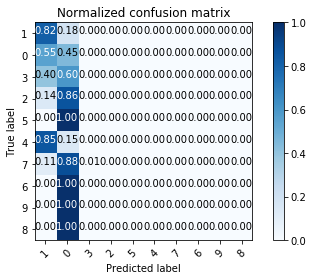

             precision    recall  f1-score   support

          1       0.62      0.81      0.70     50313
          0       0.56      0.46      0.50     42155
          3       1.00      0.00      0.00      4740
          2       0.00      0.00      0.00      2049
          5       0.00      0.00      0.00       382
          4       0.00      0.00      0.00       189
          7       0.00      0.00      0.00       145
          6       0.00      0.00      0.00        24
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.60      0.60      0.57    100000

accuracy:  0.59998


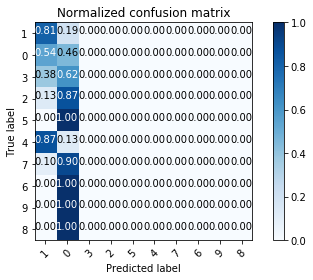

             precision    recall  f1-score   support

          1       0.61      0.82      0.70     49980
          0       0.57      0.45      0.50     42326
          3       0.00      0.00      0.00      4867
          2       0.00      0.00      0.00      2091
          5       0.00      0.00      0.00       380
          4       0.00      0.00      0.00       193
          7       0.00      0.00      0.00       145
          6       0.00      0.00      0.00        17
          8       0.00      0.00      0.00         1

avg / total       0.55      0.60      0.56    100000

accuracy:  0.59791


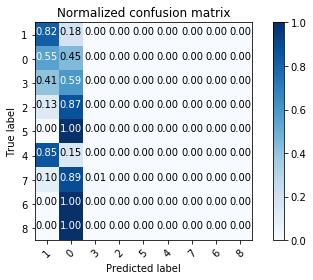

             precision    recall  f1-score   support

          1       0.61      0.82      0.70     49930
          0       0.56      0.44      0.50     42284
          3       0.00      0.00      0.00      4934
          2       0.00      0.00      0.00      2102
          5       0.00      0.00      0.00       384
          4       0.00      0.00      0.00       197
          7       0.00      0.00      0.00       144
          6       0.00      0.00      0.00        21
          9       0.00      0.00      0.00         3
          8       0.00      0.00      0.00         1

avg / total       0.54      0.60      0.56    100000

accuracy:  0.59618


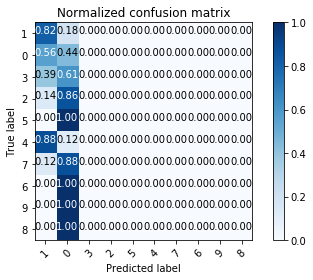

             precision    recall  f1-score   support

          1       0.62      0.81      0.70     50363
          0       0.57      0.46      0.51     42197
          3       0.14      0.00      0.00      4673
          2       0.00      0.00      0.00      2038
          5       0.00      0.00      0.00       378
          4       0.00      0.00      0.00       185
          7       0.00      0.00      0.00       146
          6       0.00      0.00      0.00        20

avg / total       0.56      0.60      0.57    100000

accuracy:  0.6016


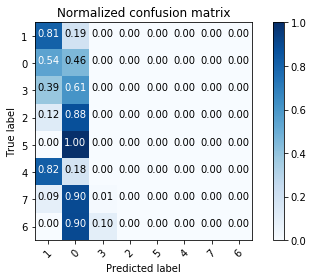

In [24]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

          1       0.61      0.82      0.70     50173
          0       0.57      0.43      0.49     42253
          3       0.00      0.00      0.00      4815
          2       0.00      0.00      0.00      2037
          5       0.00      0.00      0.00       386
          4       0.00      0.00      0.00       180
          7       0.00      0.00      0.00       134
          6       0.00      0.00      0.00        21
          8       0.00      0.00      0.00         1

avg / total       0.54      0.60      0.56    100000

accuracy:  0.59529


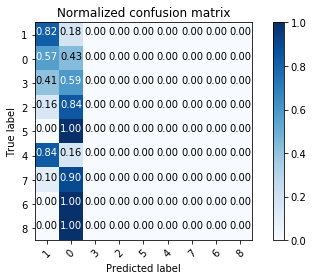

             precision    recall  f1-score   support

          1       0.61      0.82      0.70     50120
          0       0.56      0.43      0.49     42228
          3       0.00      0.00      0.00      4792
          2       0.00      0.00      0.00      2103
          5       0.00      0.00      0.00       376
          4       0.00      0.00      0.00       202
          7       0.00      0.00      0.00       156
          6       0.00      0.00      0.00        20
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.54      0.59      0.56    100000

accuracy:  0.59434


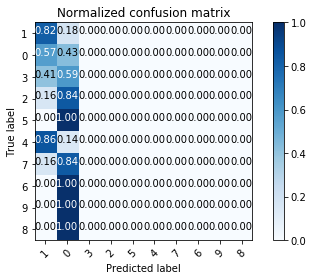

             precision    recall  f1-score   support

          1       0.61      0.82      0.70     50018
          0       0.56      0.43      0.49     42339
          3       0.00      0.00      0.00      4806
          2       0.00      0.00      0.00      2079
          5       0.00      0.00      0.00       385
          4       0.00      0.00      0.00       185
          7       0.00      0.00      0.00       159
          6       0.00      0.00      0.00        25
          9       0.00      0.00      0.00         3
          8       0.00      0.00      0.00         1

avg / total       0.54      0.59      0.56    100000

accuracy:  0.59378


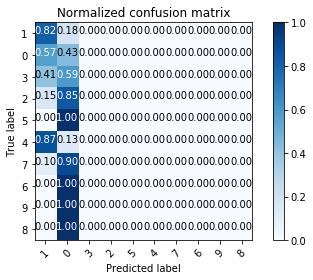

             precision    recall  f1-score   support

          1       0.61      0.82      0.70     50275
          0       0.57      0.44      0.49     42142
          3       0.00      0.00      0.00      4801
          2       0.00      0.00      0.00      2061
          5       0.00      0.00      0.00       377
          4       0.00      0.00      0.00       197
          7       0.00      0.00      0.00       131
          6       0.00      0.00      0.00        16

avg / total       0.55      0.60      0.56    100000

accuracy:  0.5977


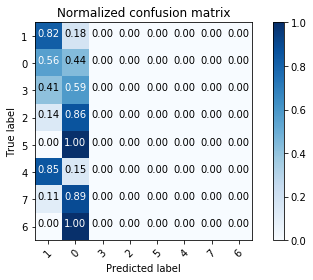

             precision    recall  f1-score   support

          1       0.61      0.82      0.70     50316
          0       0.57      0.44      0.49     42170
          3       0.00      0.00      0.00      4714
          2       0.00      0.00      0.00      2080
          5       0.00      0.00      0.00       387
          4       0.00      0.00      0.00       177
          7       0.00      0.00      0.00       137
          6       0.00      0.00      0.00        19

avg / total       0.55      0.60      0.56    100000

accuracy:  0.5967


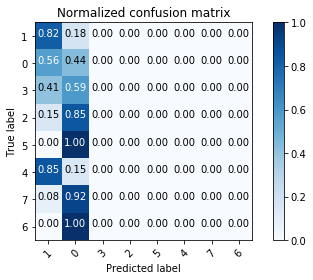

             precision    recall  f1-score   support

          1       0.61      0.82      0.70     49977
          0       0.56      0.43      0.49     42311
          3       0.00      0.00      0.00      4893
          2       0.00      0.00      0.00      2060
          5       0.00      0.00      0.00       375
          4       0.00      0.00      0.00       205
          7       0.00      0.00      0.00       153
          6       0.00      0.00      0.00        22
          9       0.00      0.00      0.00         3
          8       0.00      0.00      0.00         1

avg / total       0.54      0.59      0.56    100000

accuracy:  0.59266


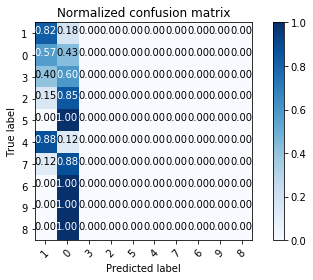

             precision    recall  f1-score   support

          1       0.61      0.83      0.70     49995
          0       0.57      0.43      0.49     42266
          3       0.00      0.00      0.00      4893
          2       0.00      0.00      0.00      2090
          5       0.00      0.00      0.00       400
          4       0.00      0.00      0.00       195
          7       0.00      0.00      0.00       141
          6       0.00      0.00      0.00        20

avg / total       0.54      0.60      0.56    100000

accuracy:  0.59502


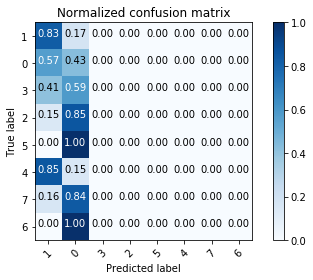

             precision    recall  f1-score   support

          1       0.61      0.82      0.70     50298
          0       0.56      0.44      0.49     42215
          3       0.00      0.00      0.00      4714
          2       0.00      0.00      0.00      2050
          5       0.00      0.00      0.00       362
          4       0.00      0.00      0.00       187
          7       0.00      0.00      0.00       149
          6       0.00      0.00      0.00        21
          9       0.00      0.00      0.00         3
          8       0.00      0.00      0.00         1

avg / total       0.55      0.60      0.56    100000

accuracy:  0.59602


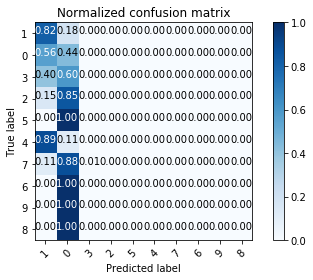

             precision    recall  f1-score   support

          1       0.61      0.82      0.70     50278
          0       0.57      0.44      0.49     42164
          3       0.00      0.00      0.00      4771
          2       0.00      0.00      0.00      2058
          5       0.00      0.00      0.00       366
          4       0.00      0.00      0.00       184
          7       0.00      0.00      0.00       153
          6       0.00      0.00      0.00        24
          8       0.00      0.00      0.00         2

avg / total       0.55      0.60      0.56    100000

accuracy:  0.59709


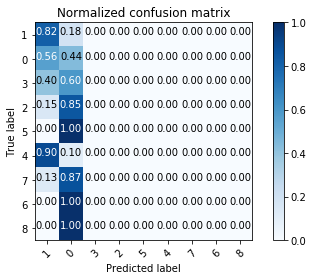

             precision    recall  f1-score   support

          1       0.61      0.82      0.70     50015
          0       0.57      0.43      0.49     42317
          3       0.00      0.00      0.00      4836
          2       0.00      0.00      0.00      2082
          5       0.00      0.00      0.00       396
          4       0.00      0.00      0.00       198
          7       0.00      0.00      0.00       137
          6       0.00      0.00      0.00        17
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.54      0.59      0.56    100000

accuracy:  0.59451


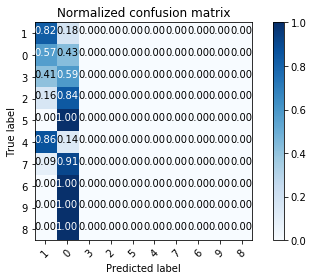

In [25]:
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=150, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()